-----------------------------------


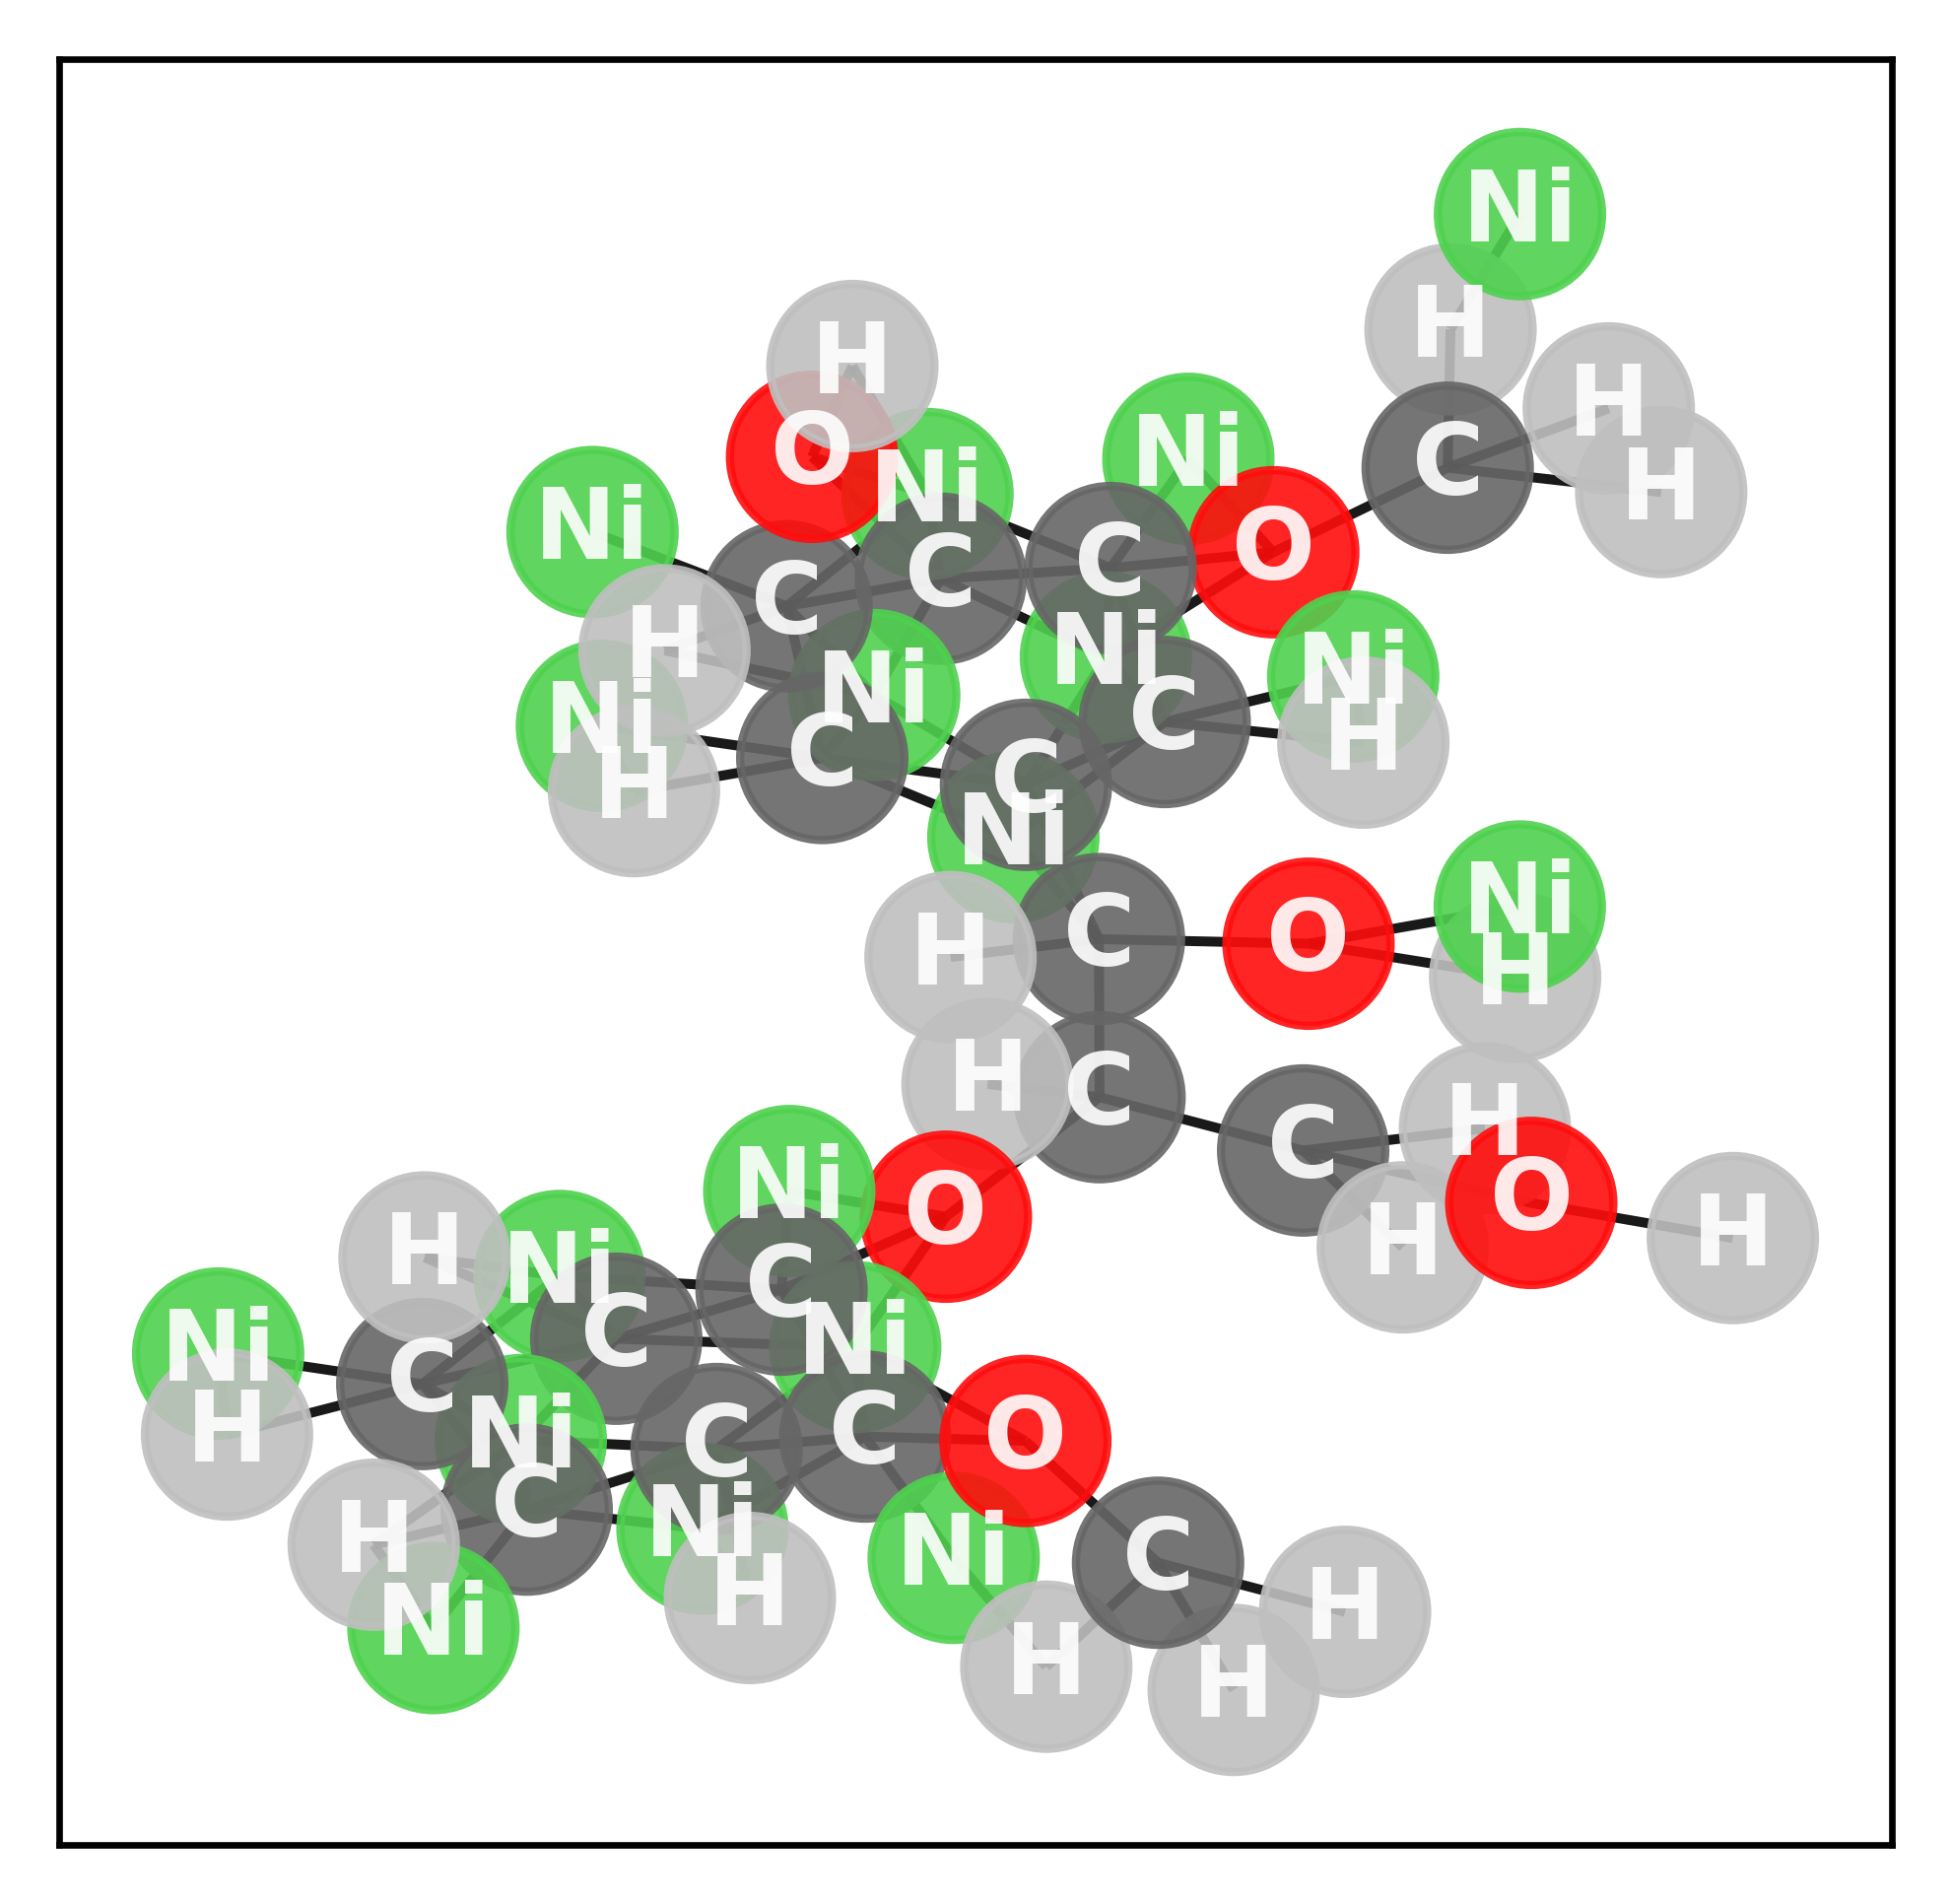

System: ni-mol1
GNN energy = -270.06 eV 
VASP energy = -269.48505176 eV
Abs. Error = 0.57 eV
-----------------------------------


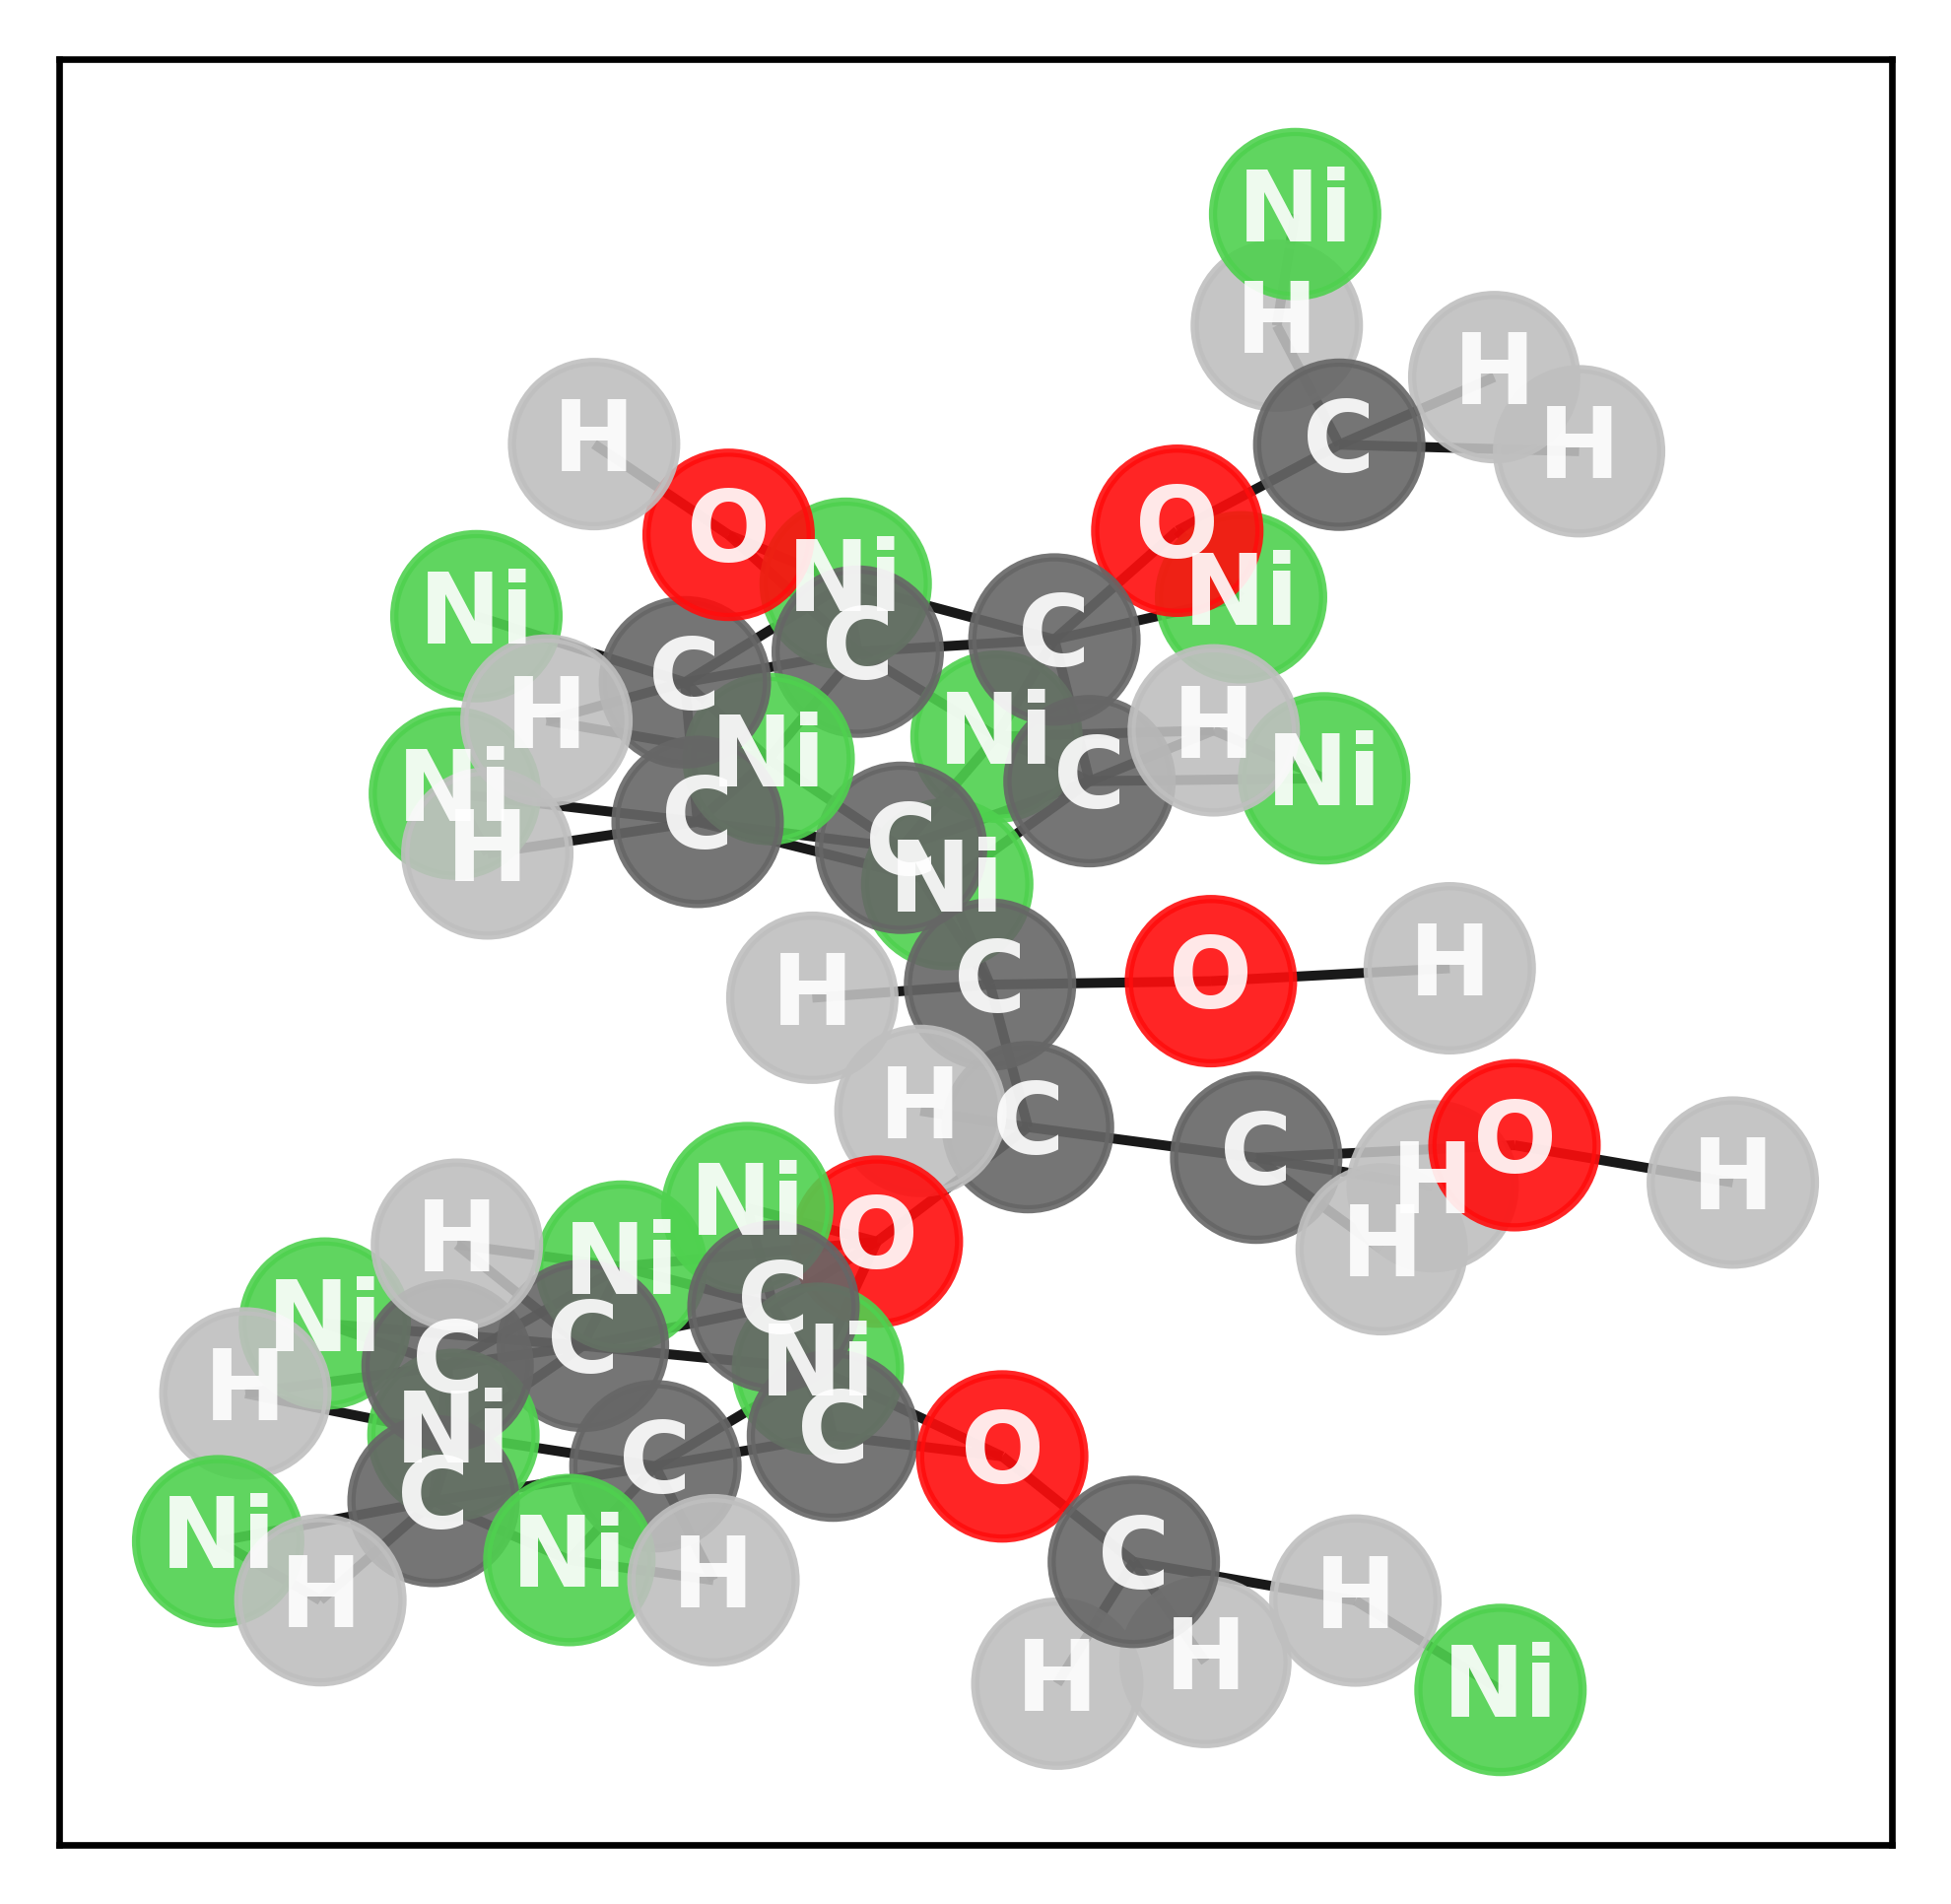

System: ni-mol2
GNN energy = -269.73 eV 
VASP energy = -268.97141166 eV
Abs. Error = 0.76 eV
-----------------------------------


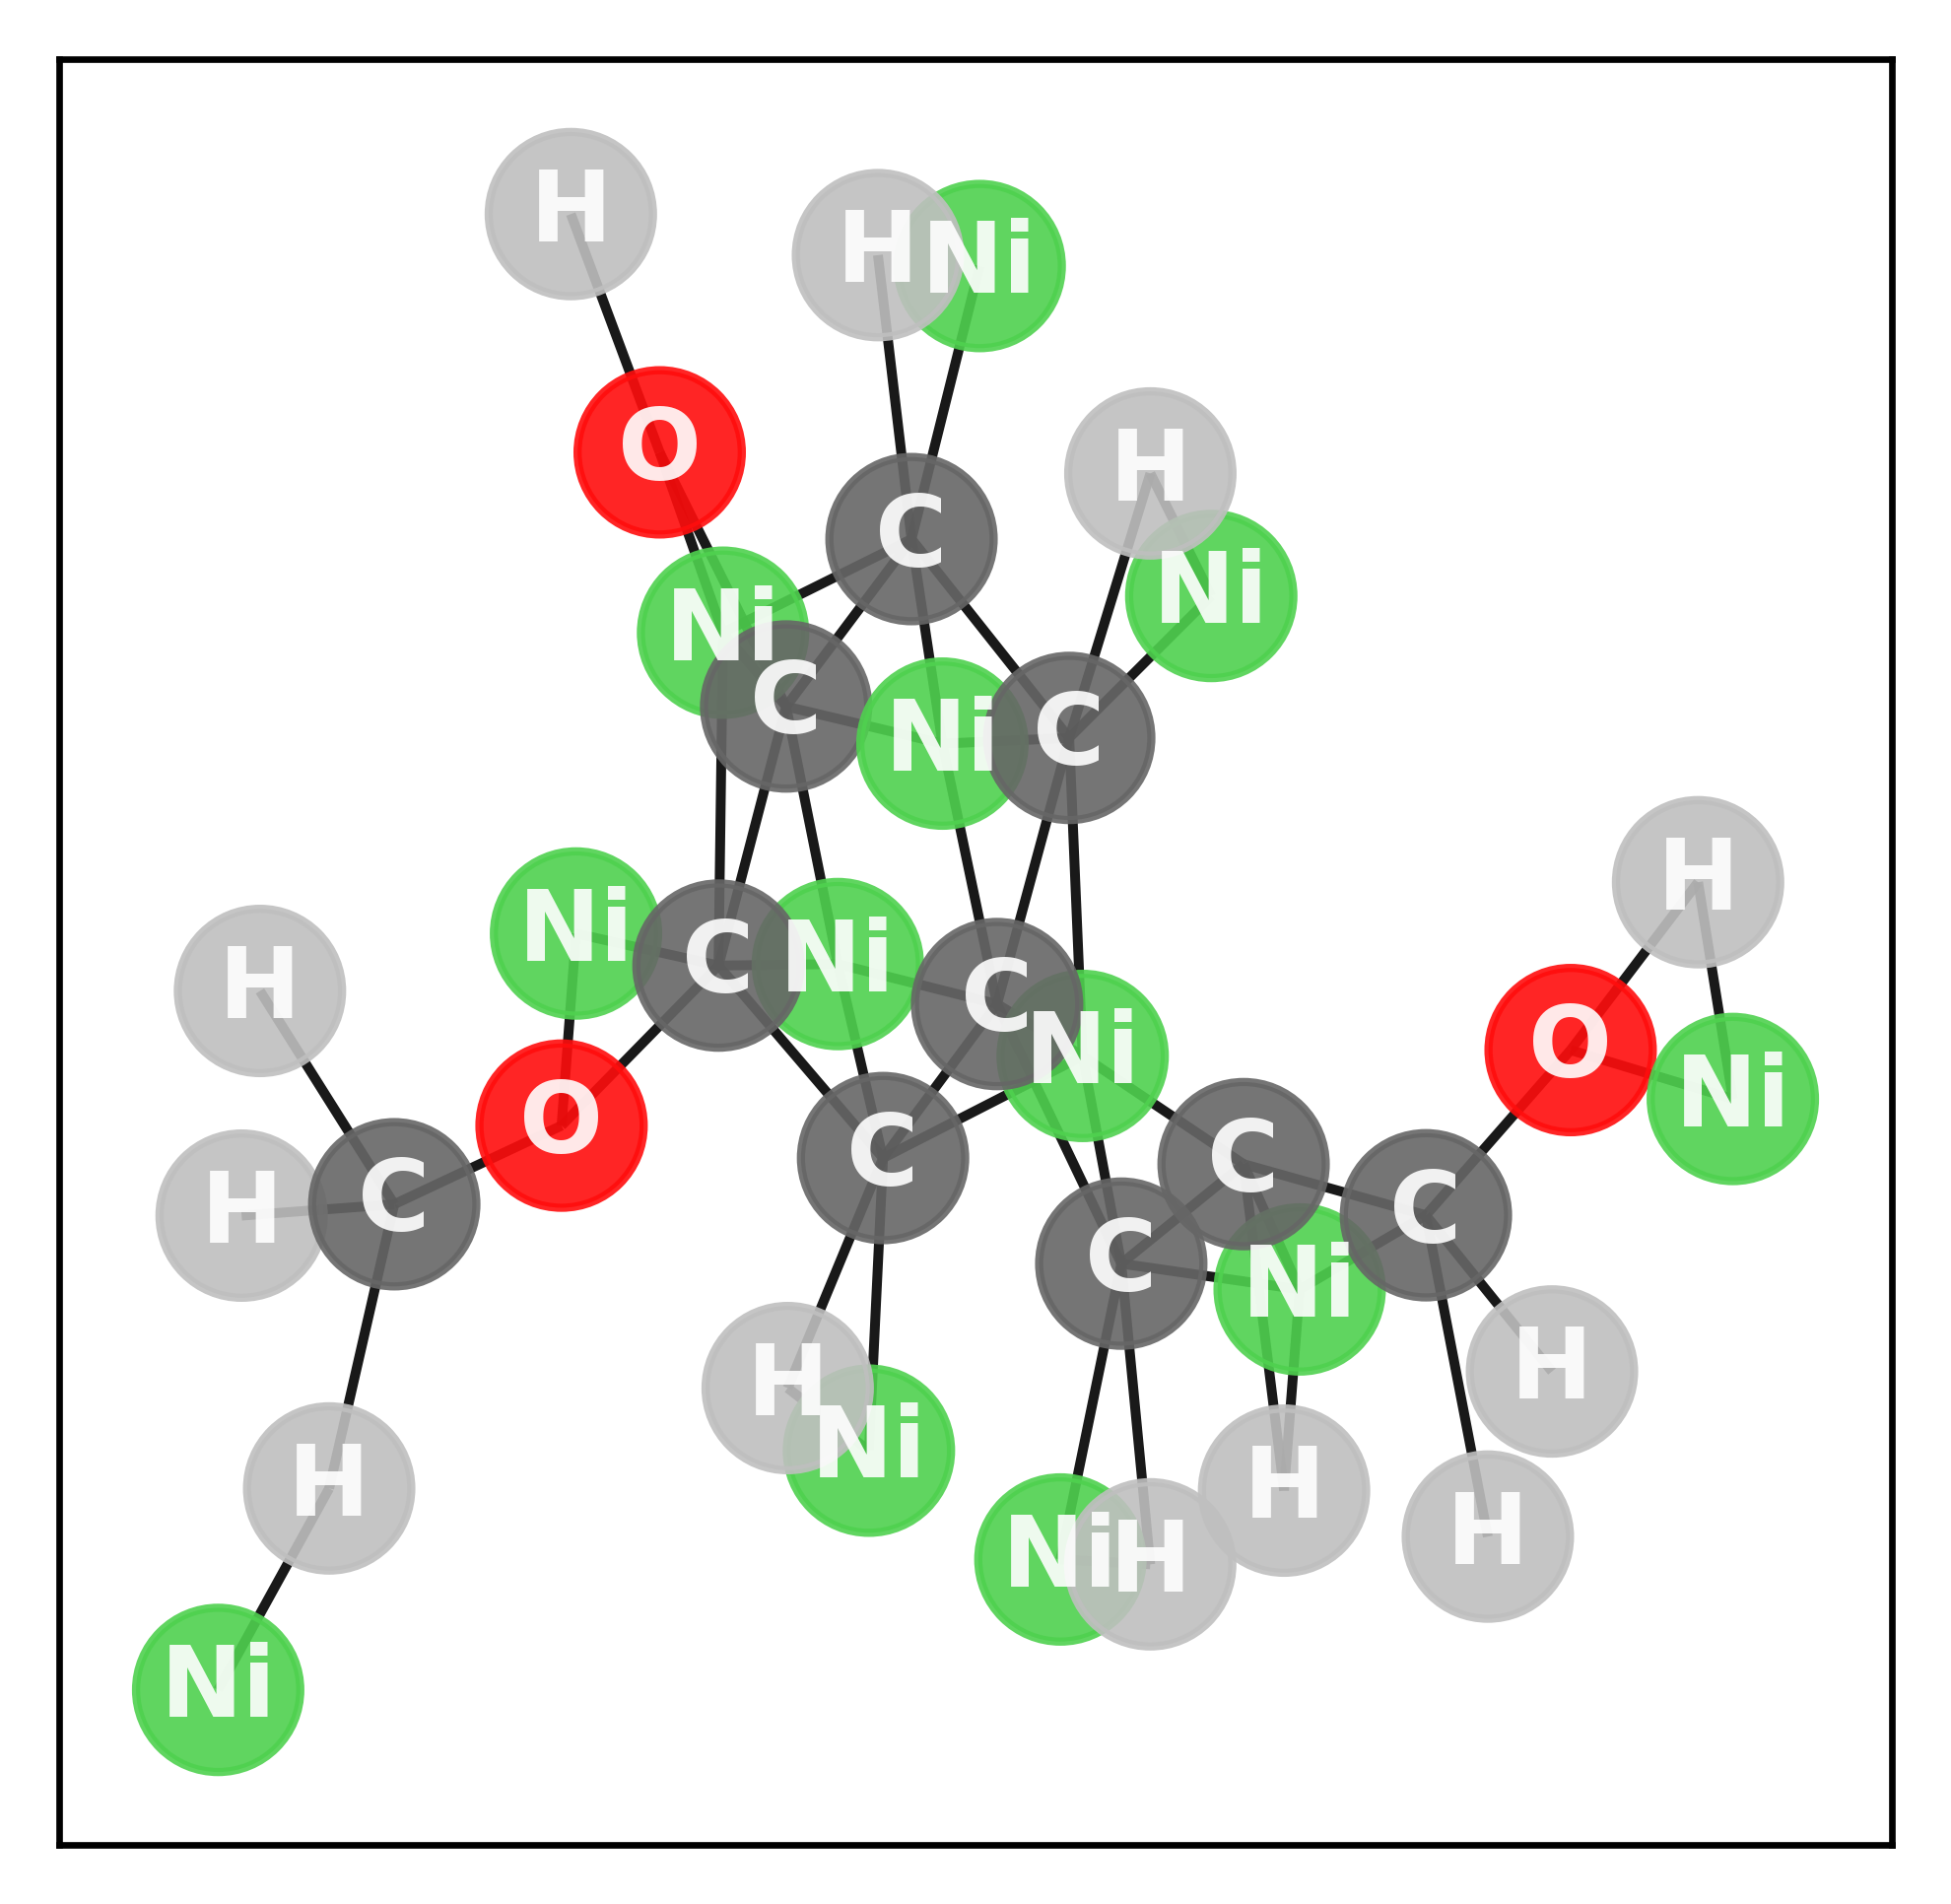

System: ni-mol3
GNN energy = -156.59 eV 
VASP energy = -156.38838357000003 eV
Abs. Error = 0.20 eV
-----------------------------------


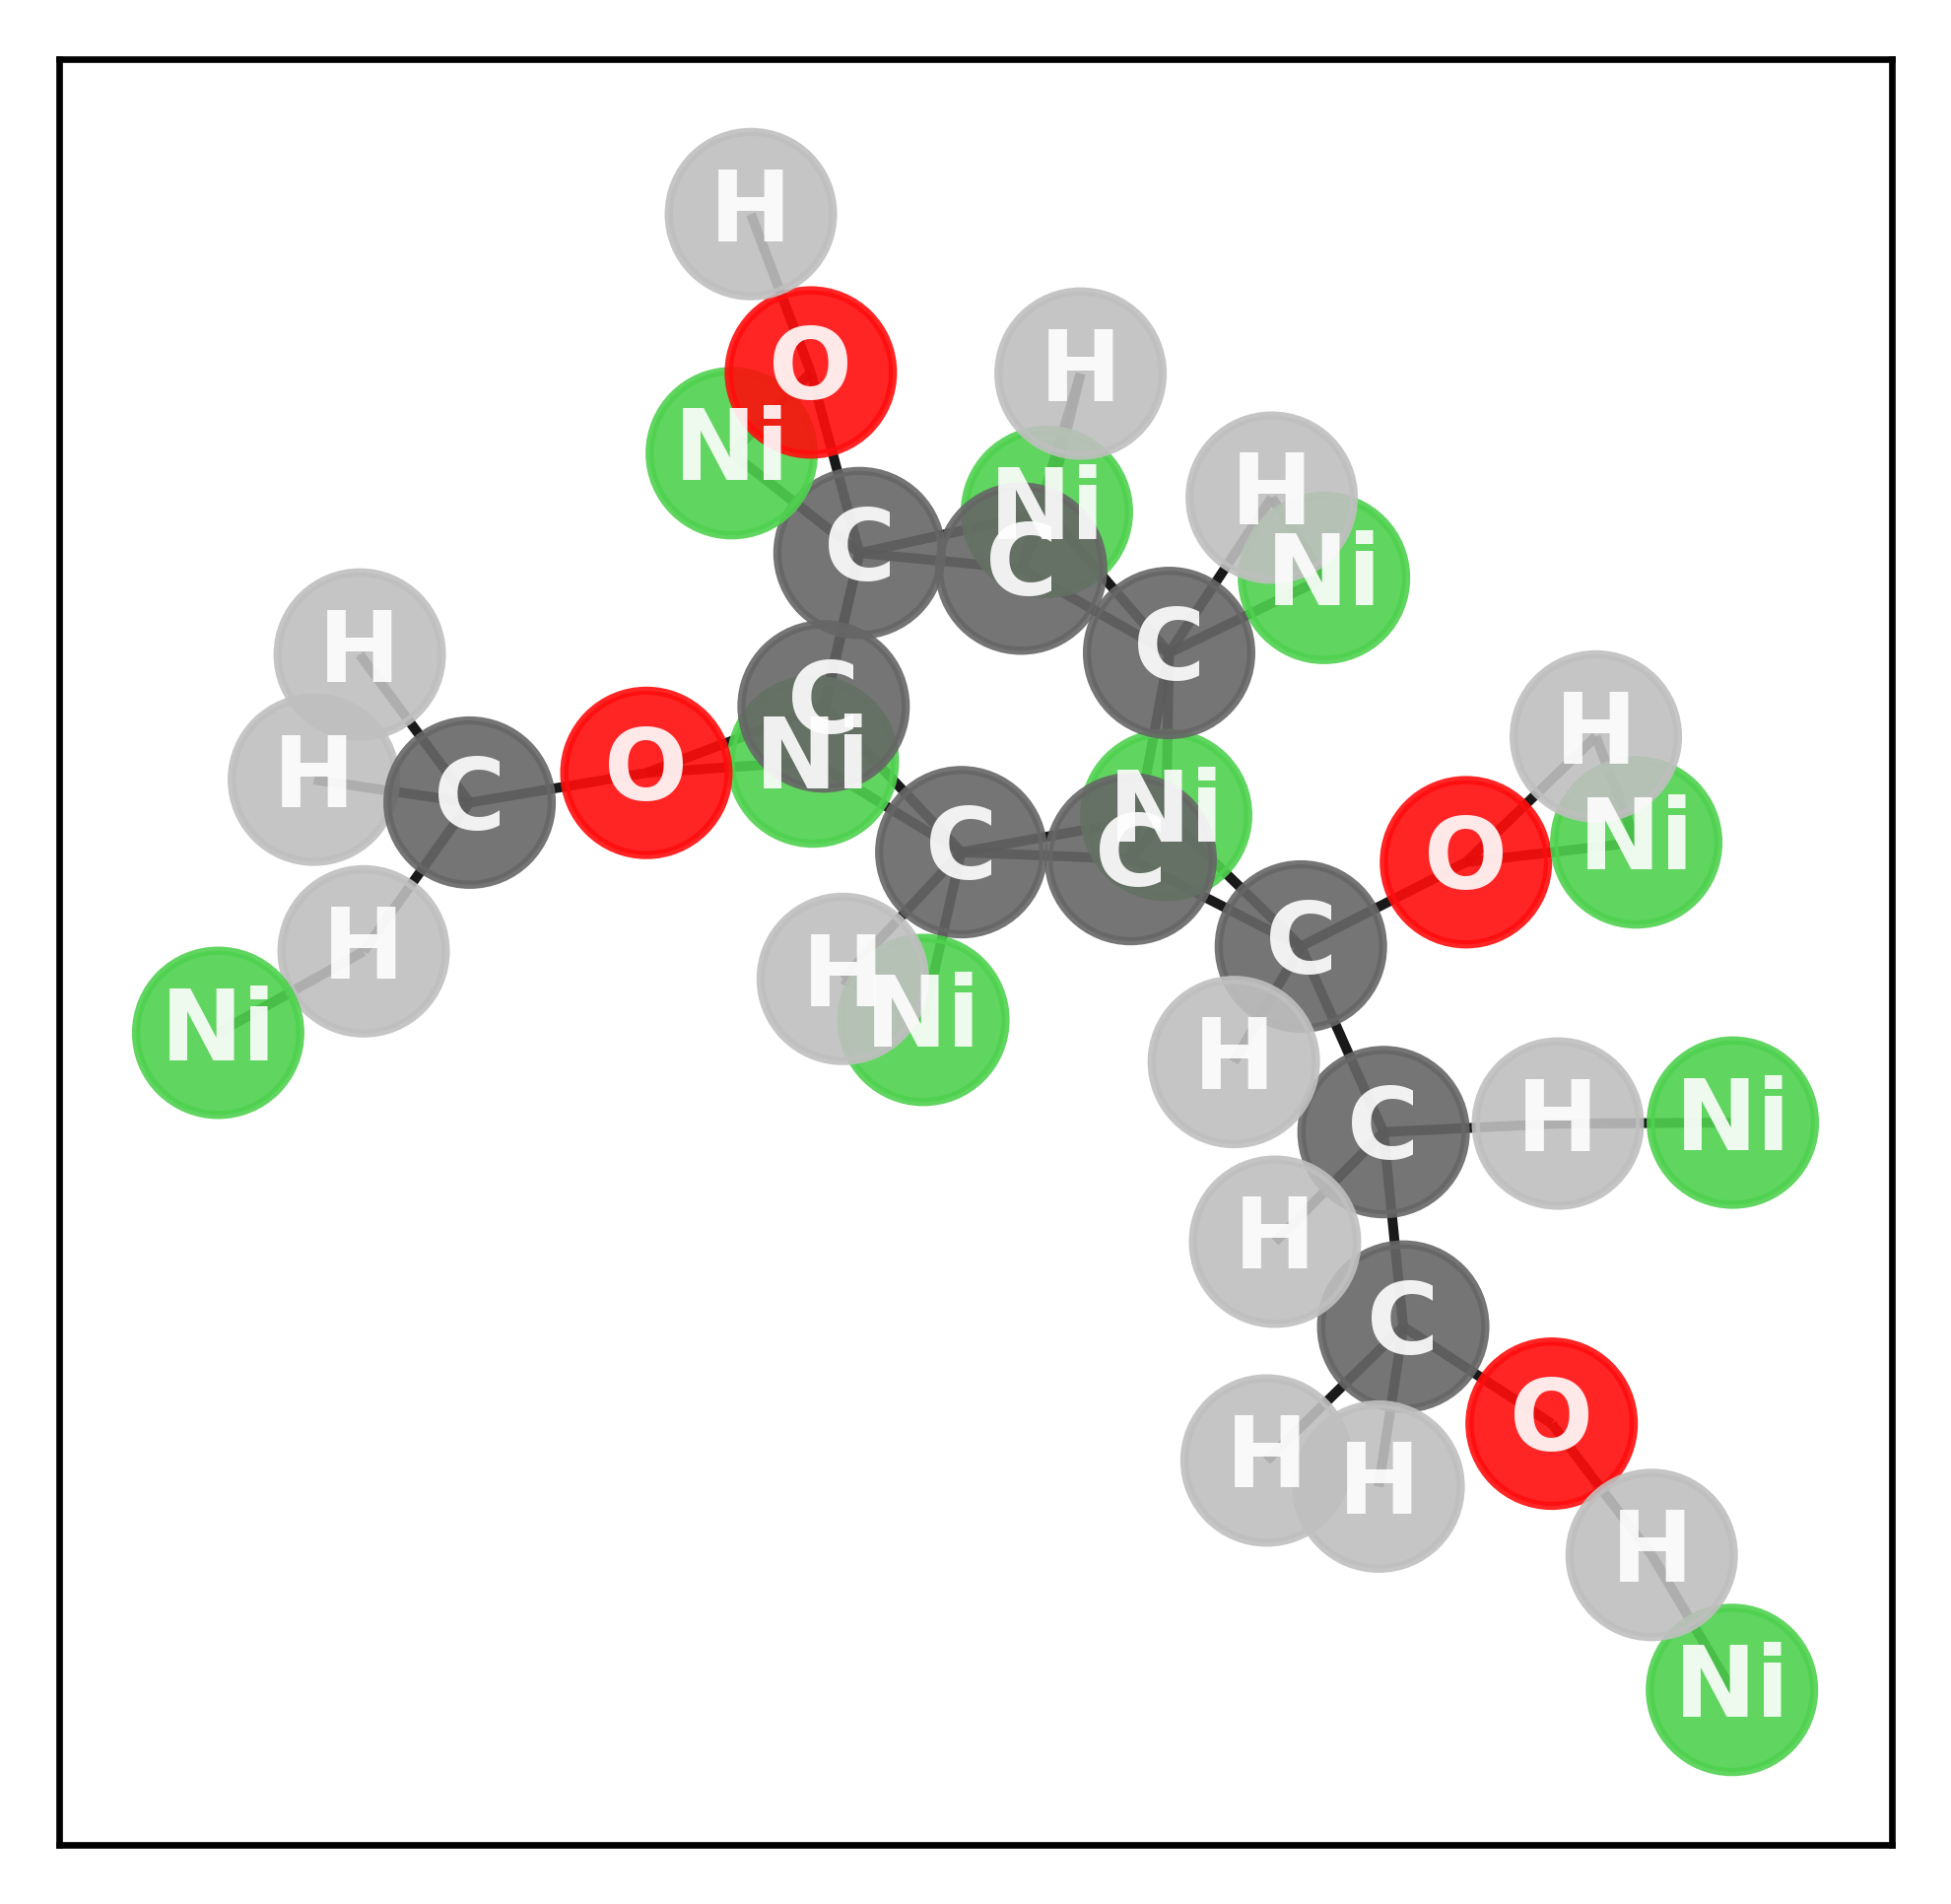

System: ni-mol4
GNN energy = -170.85 eV 
VASP energy = -170.59217589999997 eV
Abs. Error = 0.25 eV
-----------------------------------


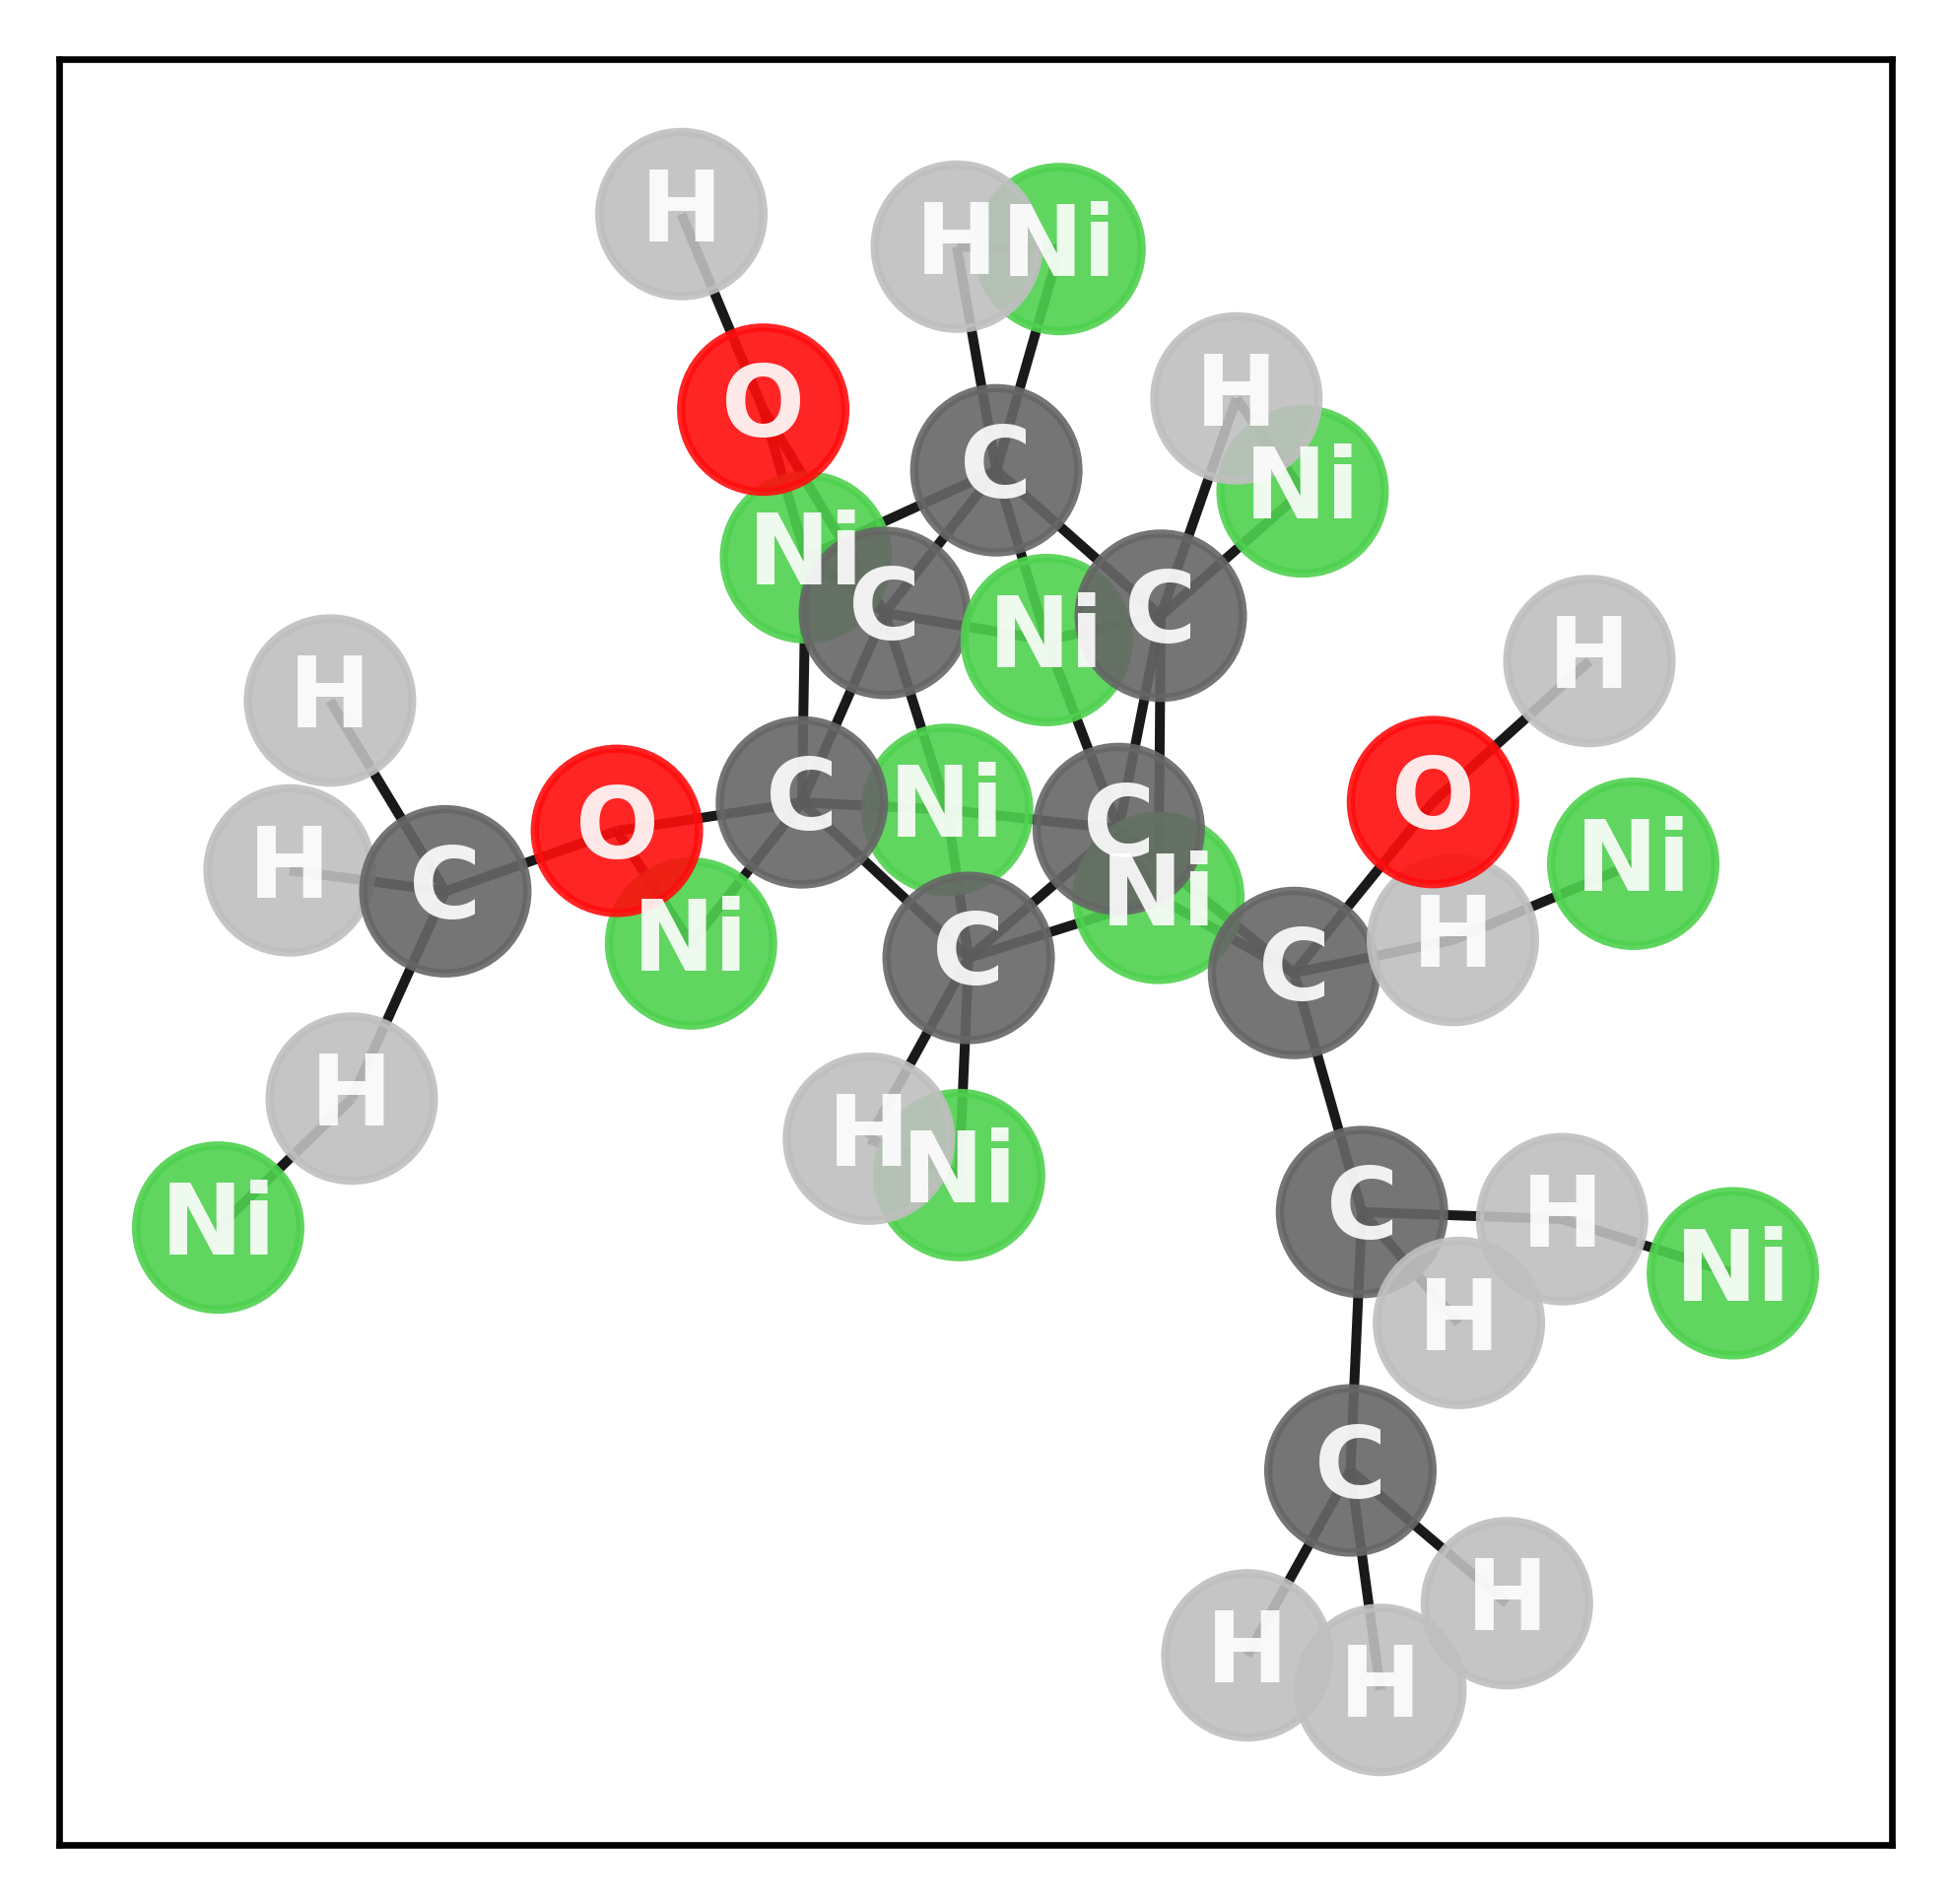

System: ni-mol5
GNN energy = -164.33 eV 
VASP energy = -163.79779004000005 eV
Abs. Error = 0.53 eV
-----------------------------------


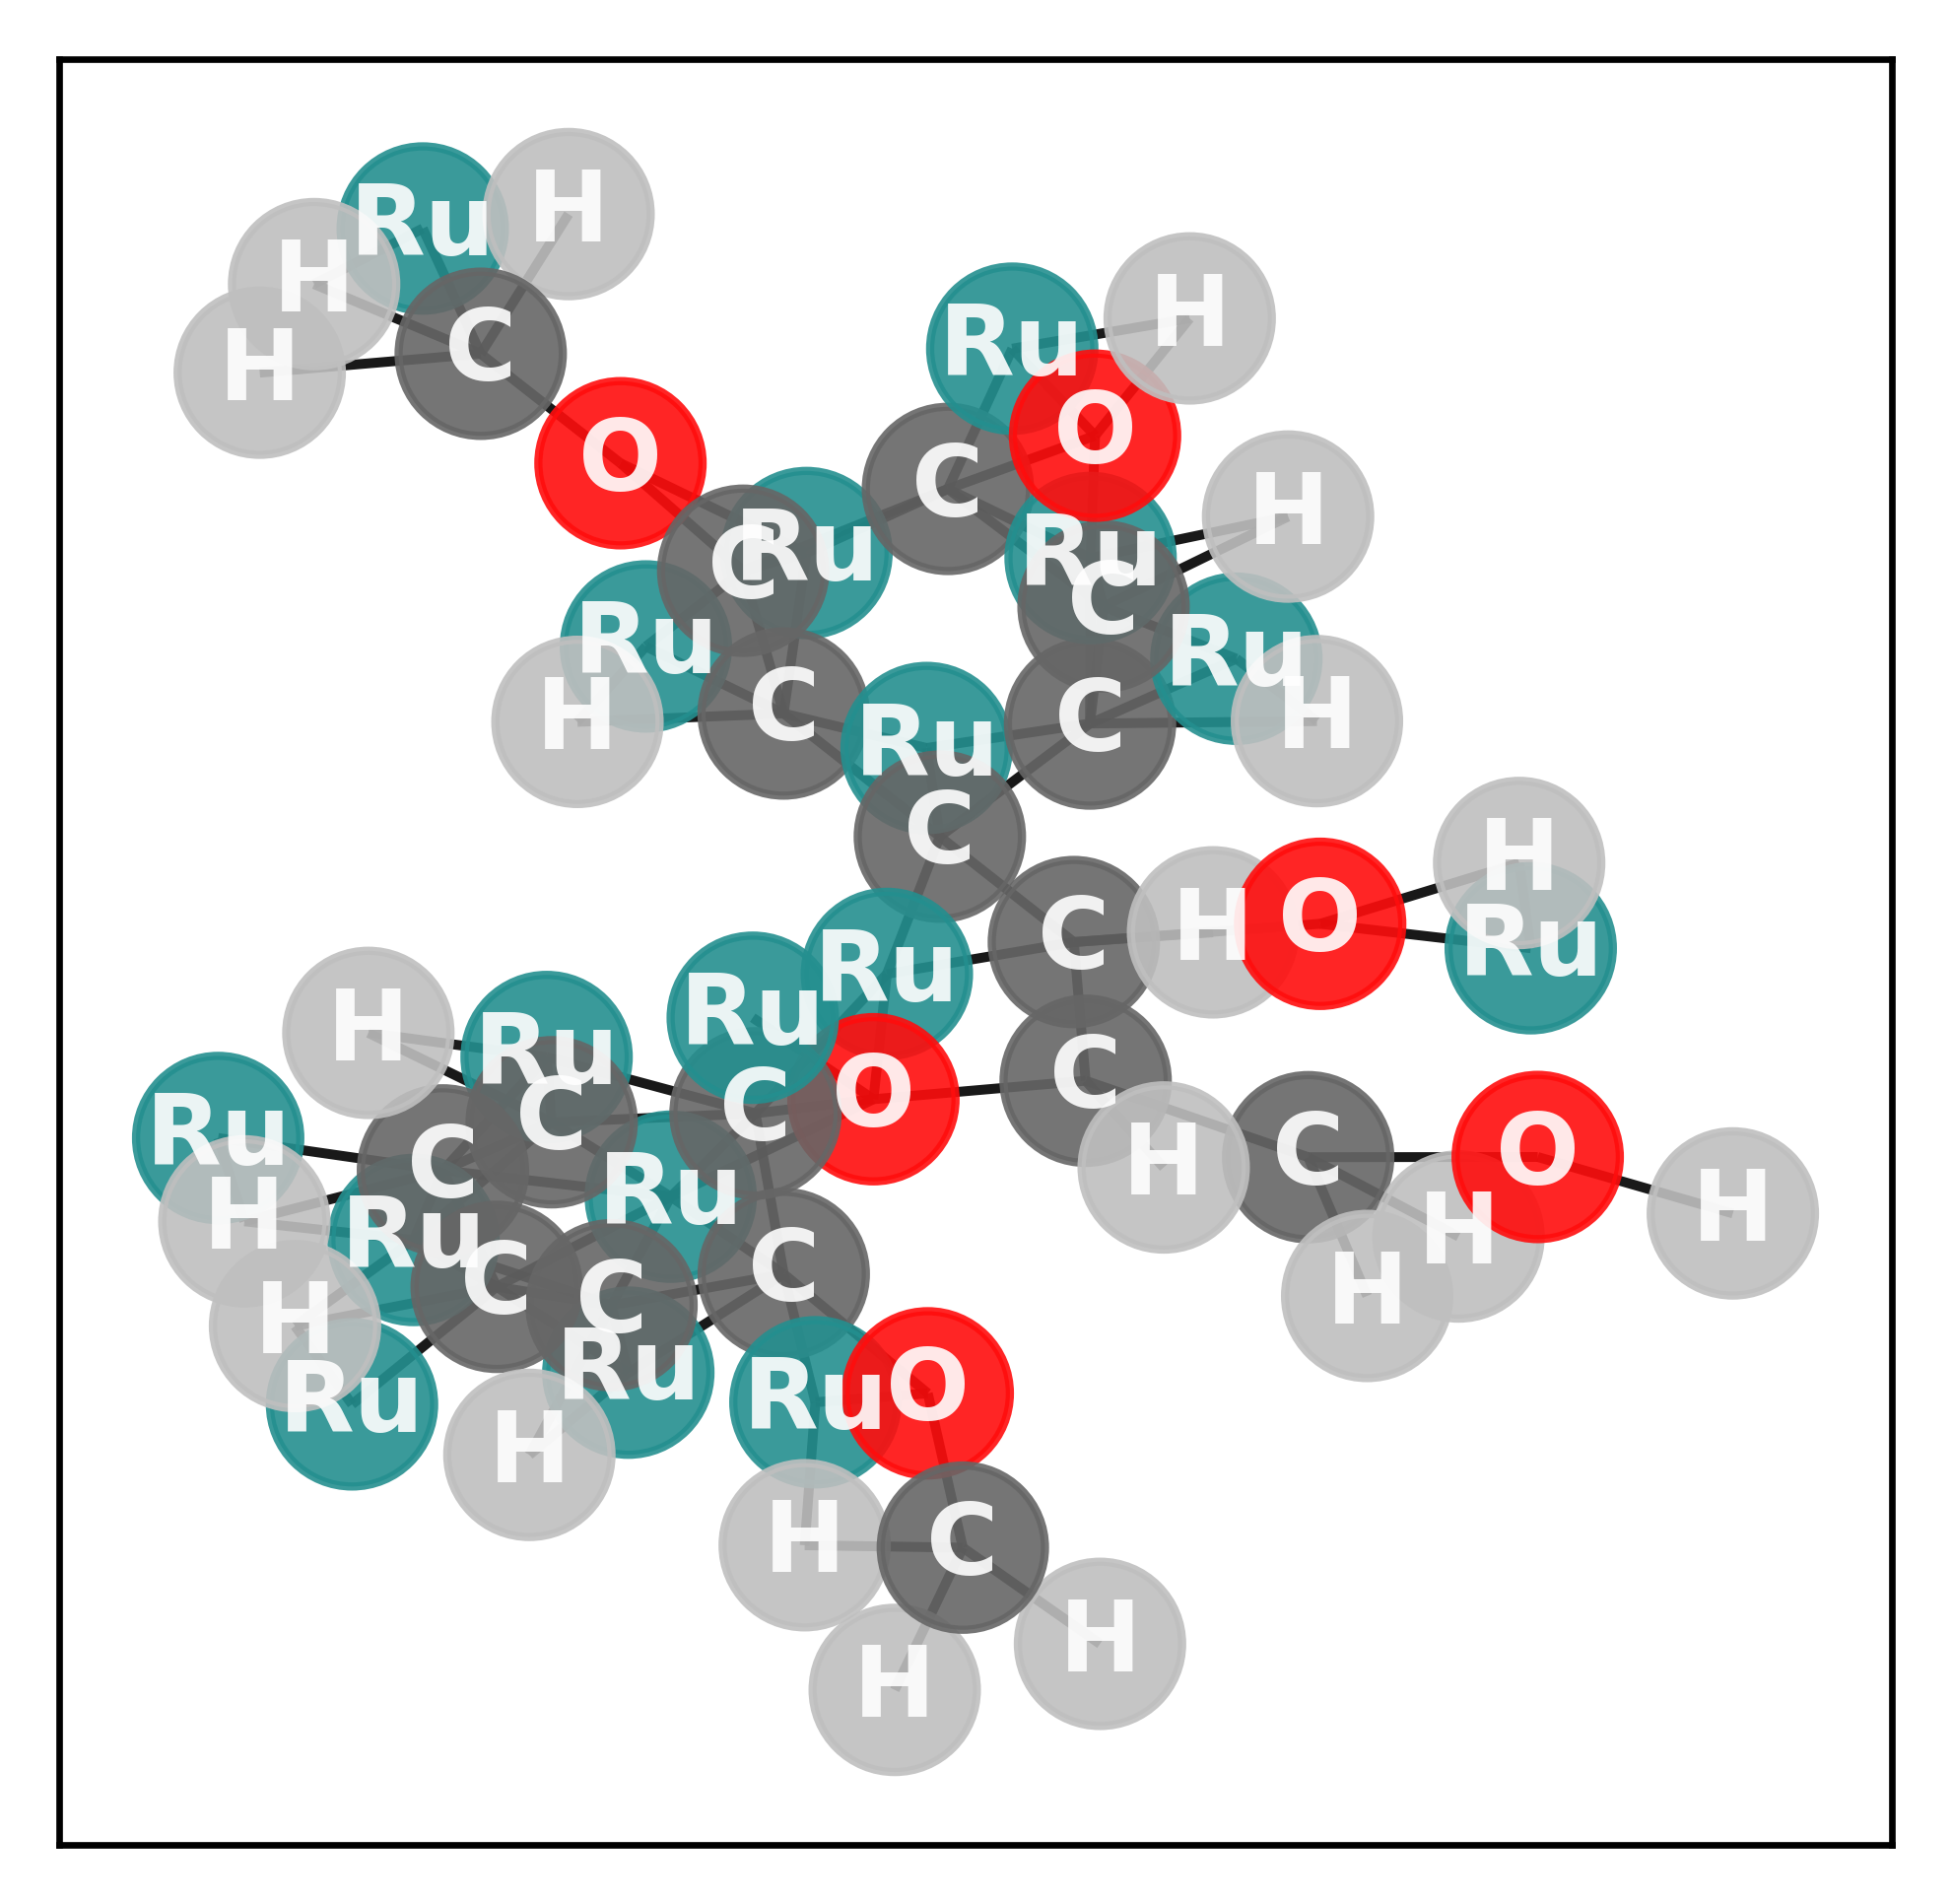

System: ru-mol1
GNN energy = -271.13 eV 
VASP energy = -270.26880955 eV
Abs. Error = 0.86 eV
-----------------------------------


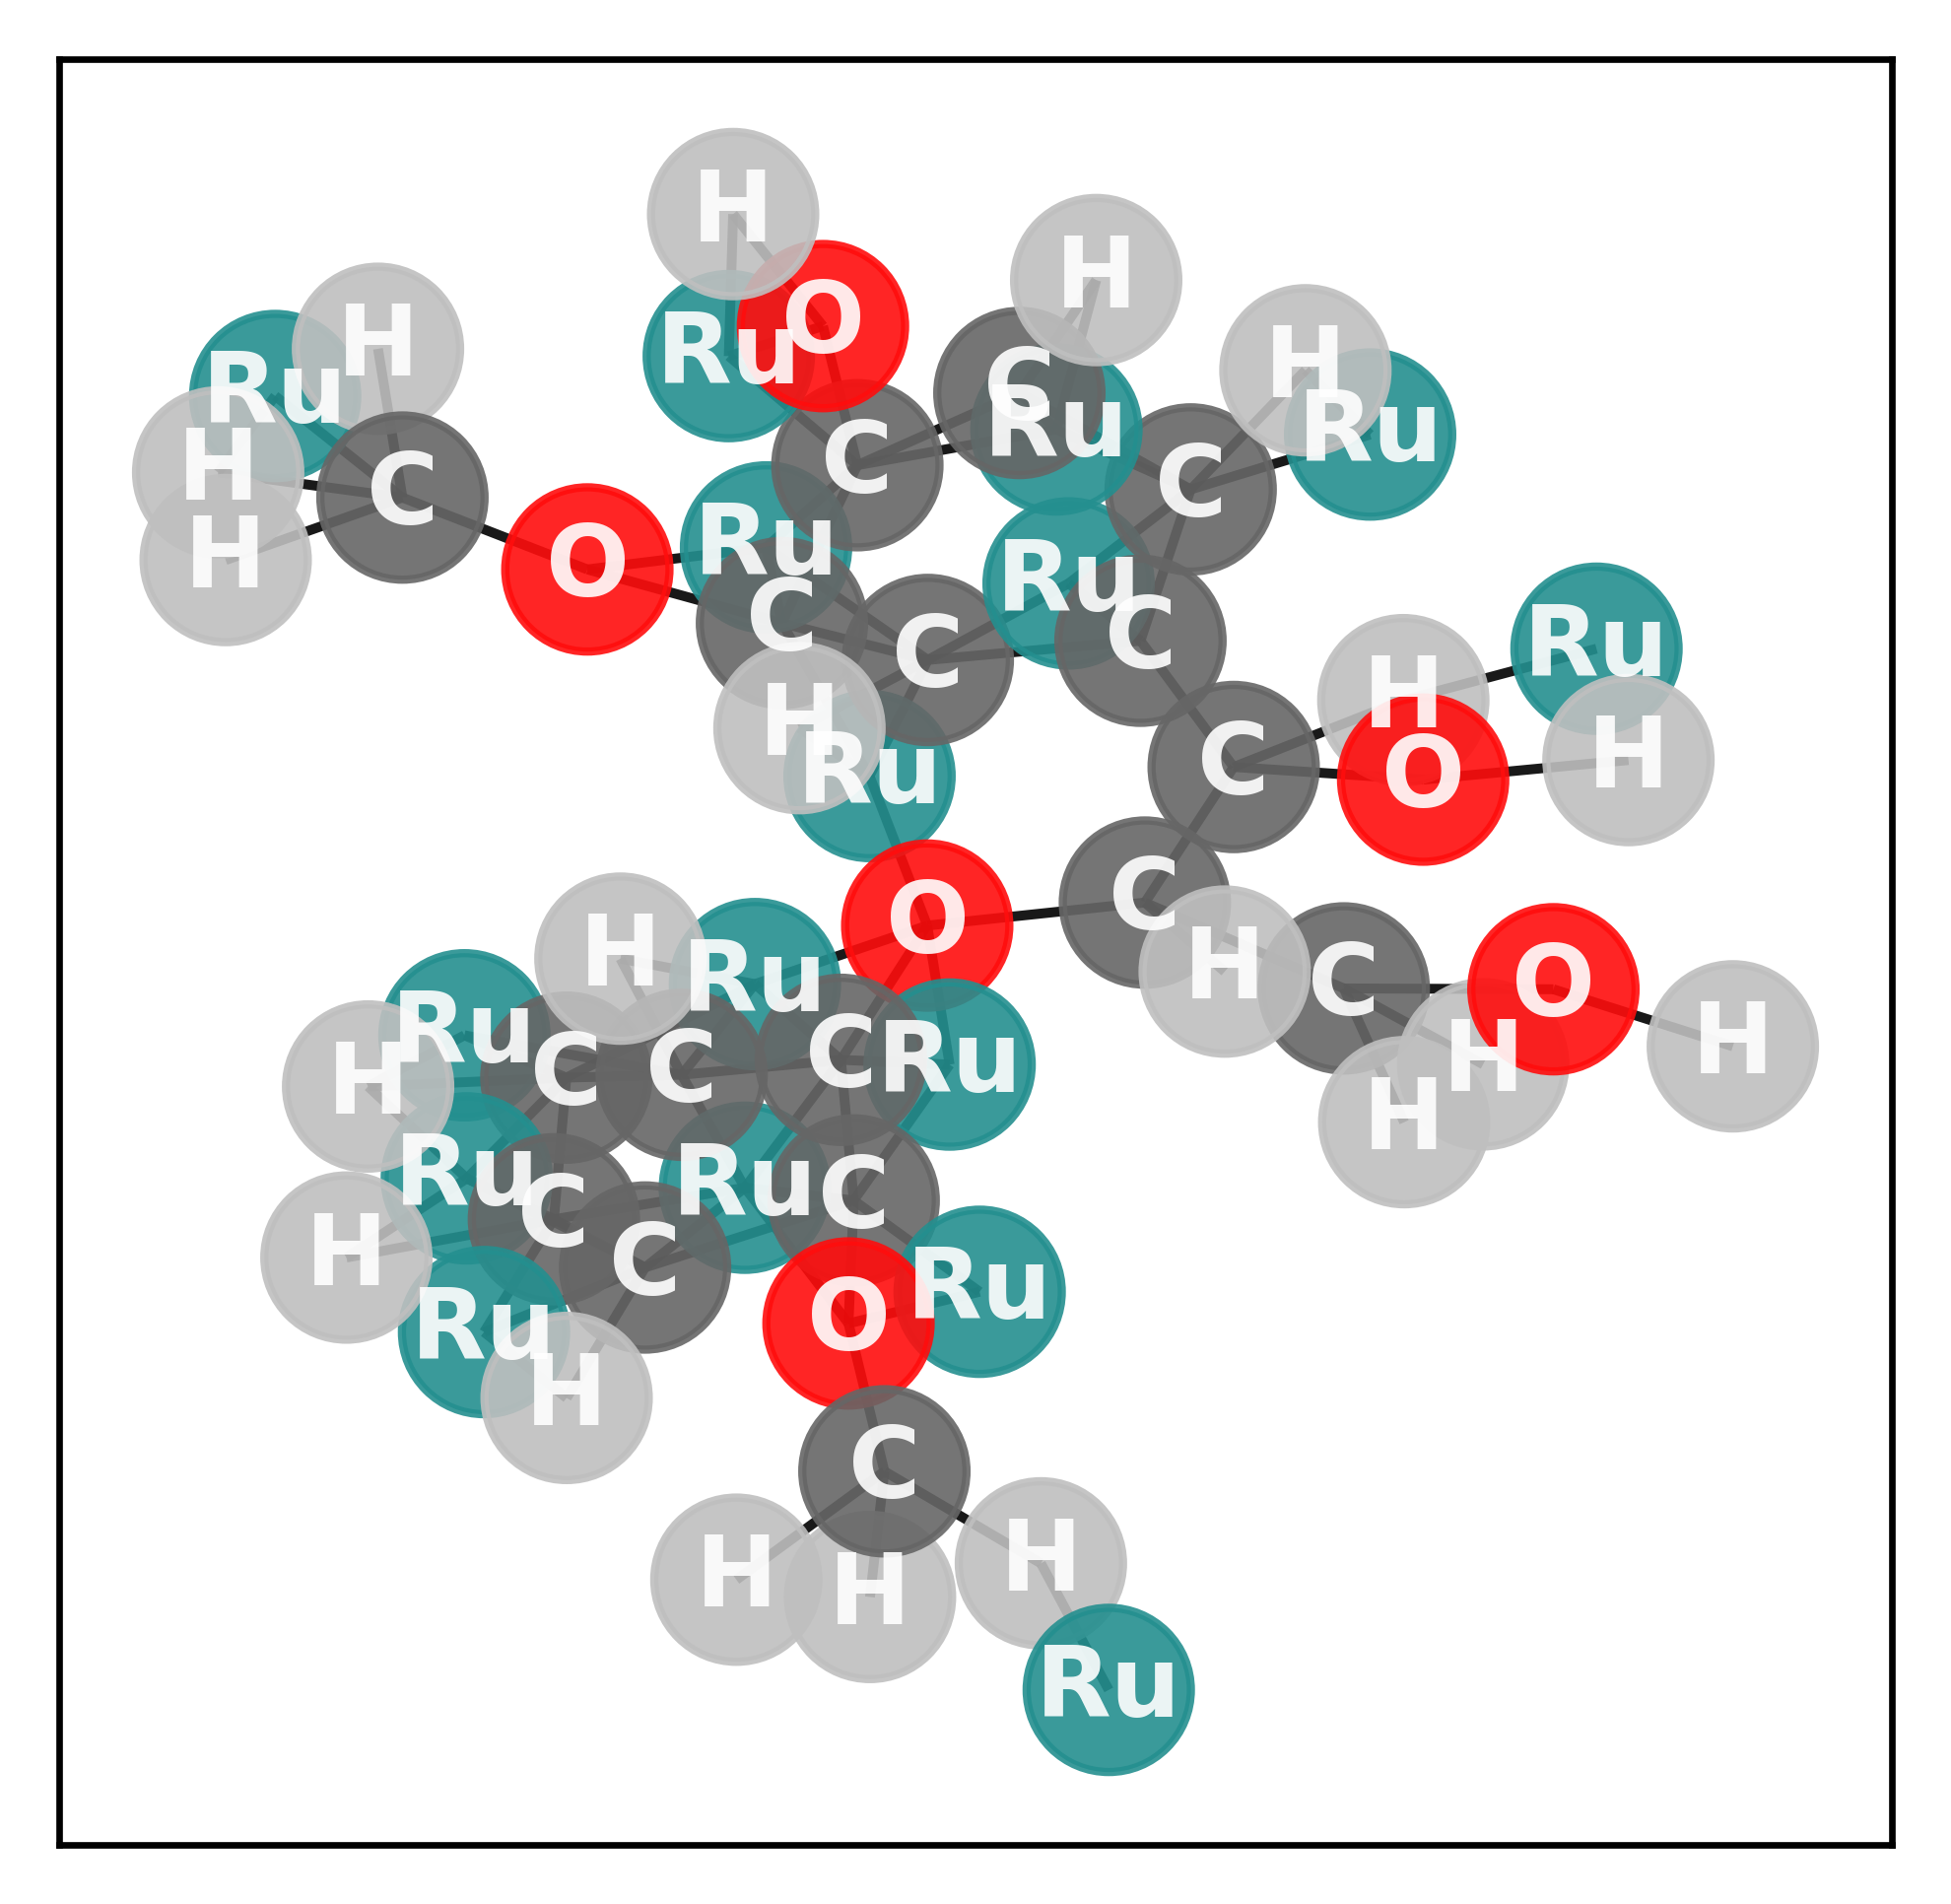

System: ru-mol2
GNN energy = -270.50 eV 
VASP energy = -269.7343701799999 eV
Abs. Error = 0.77 eV
-----------------------------------


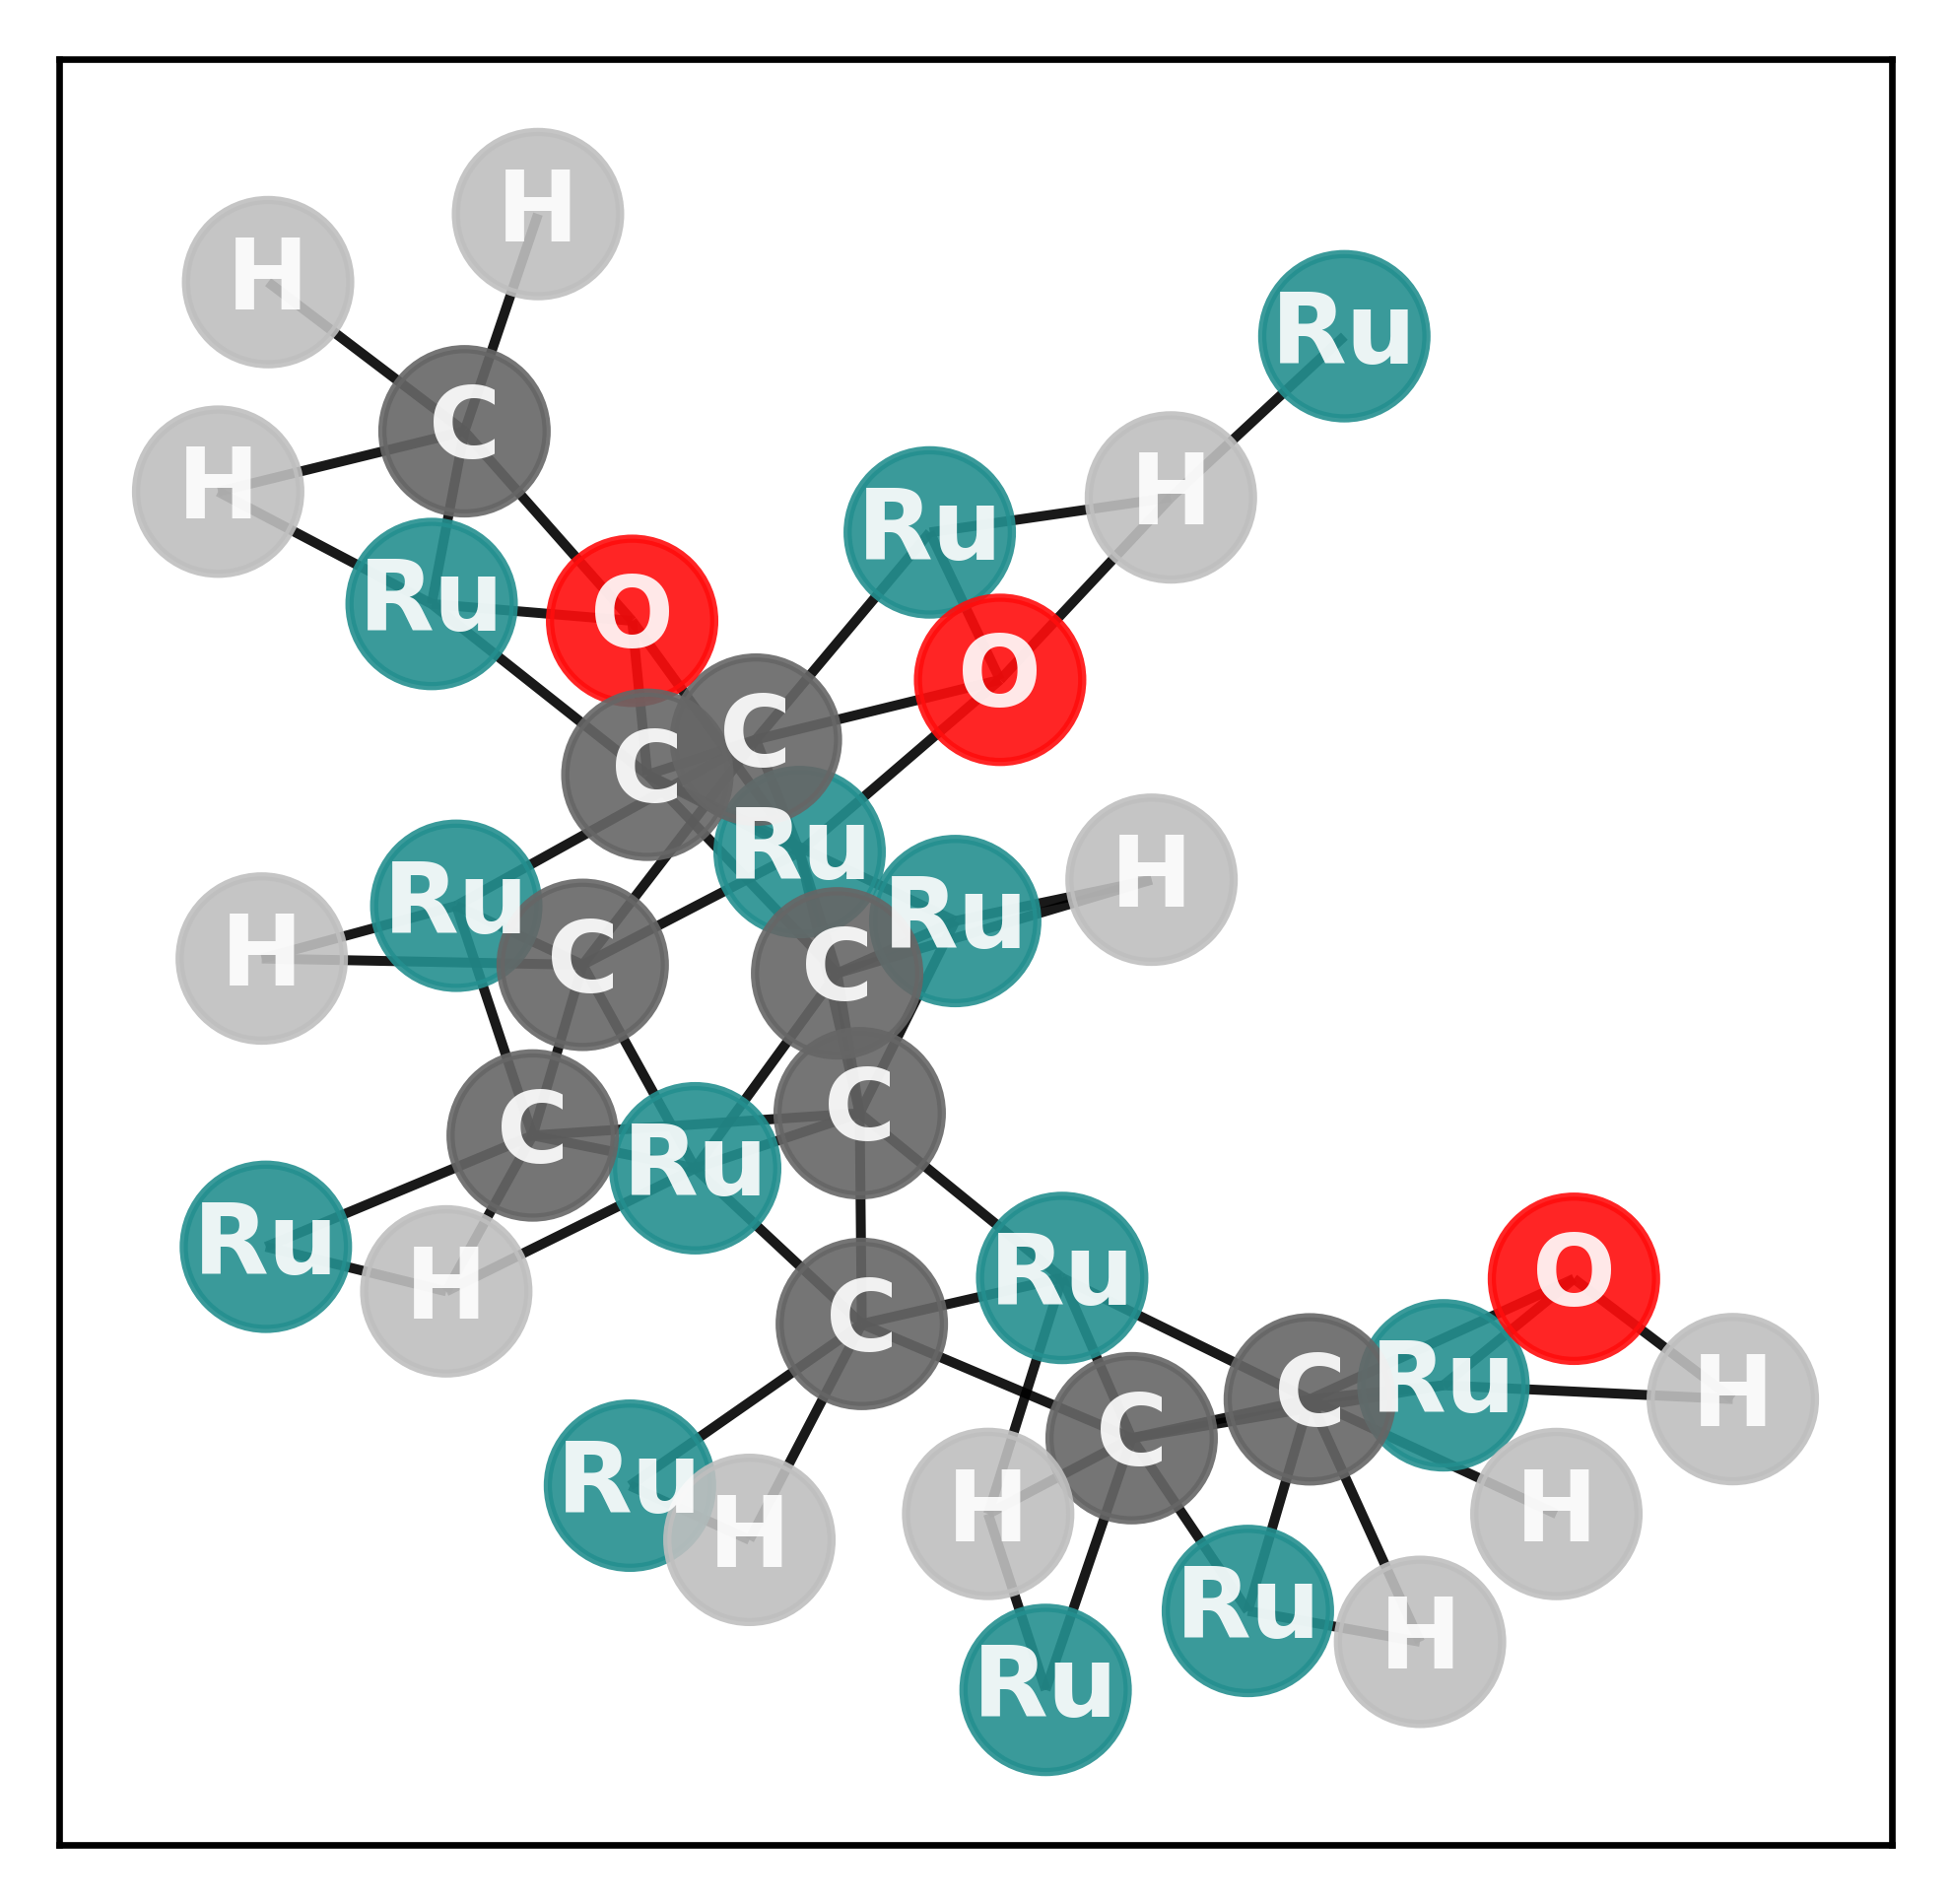

System: ru-mol3
GNN energy = -157.36 eV 
VASP energy = -157.01538868 eV
Abs. Error = 0.35 eV
-----------------------------------


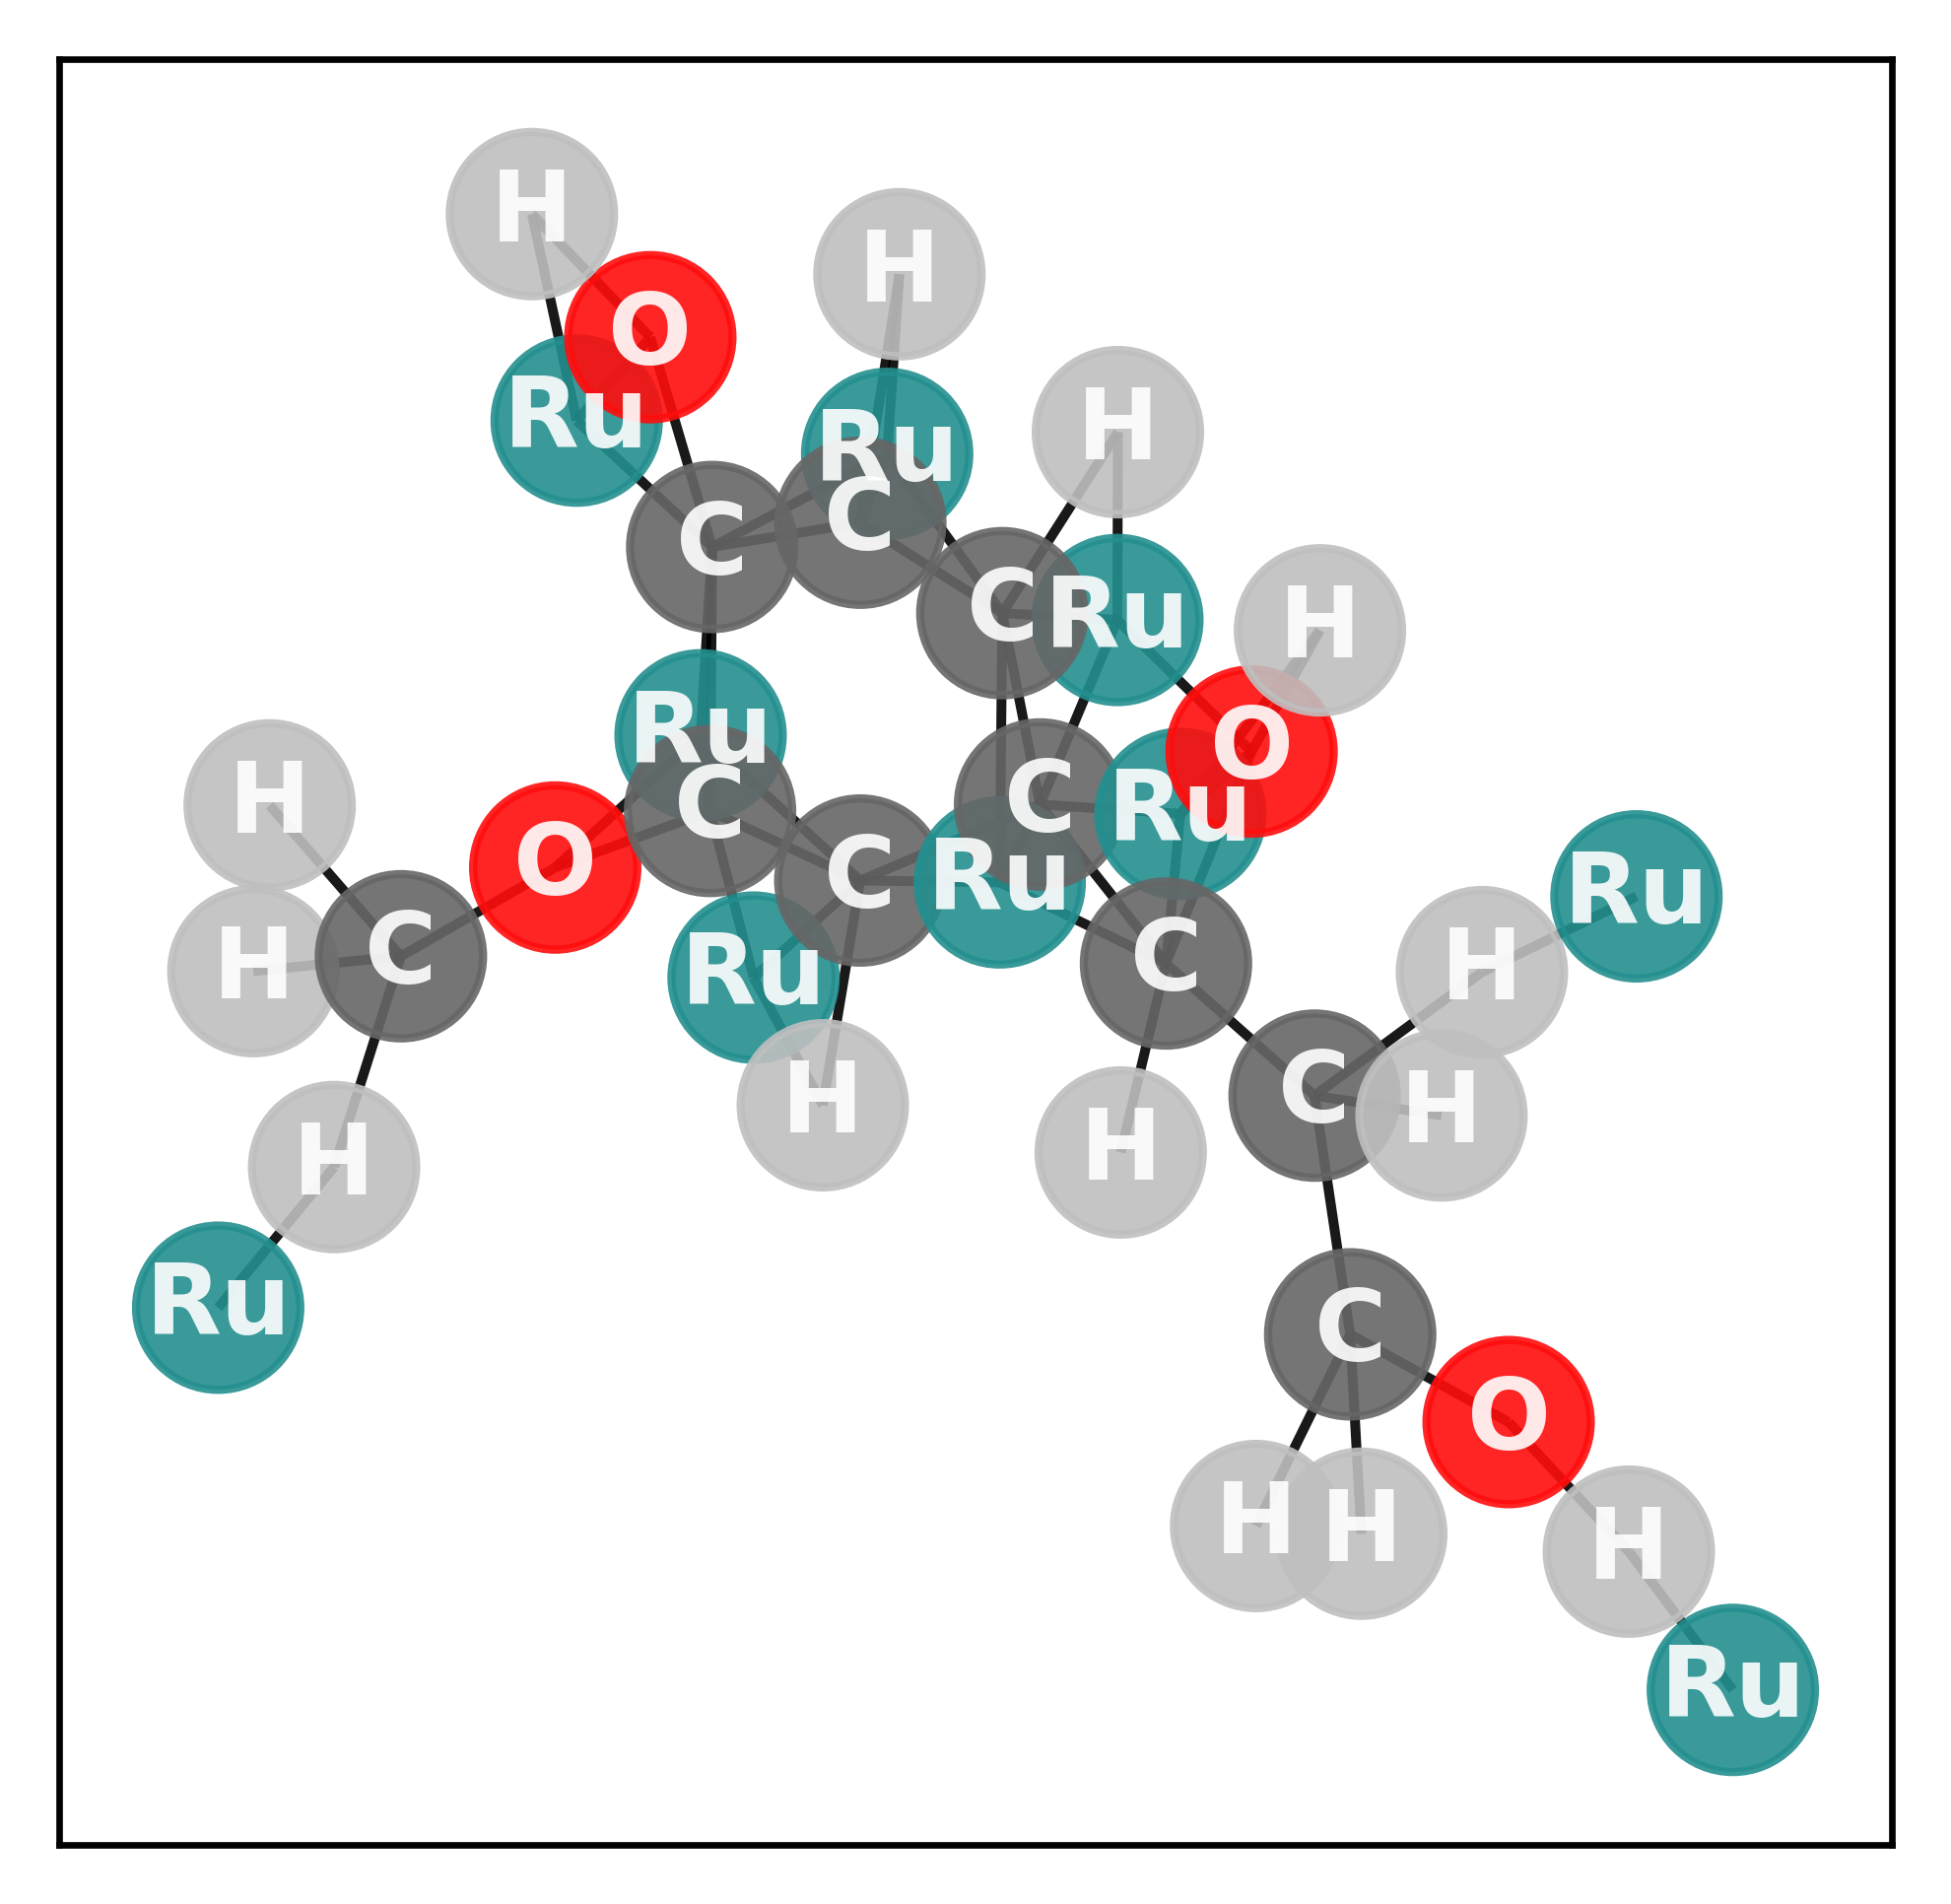

System: ru-mol4
GNN energy = -171.67 eV 
VASP energy = -171.17300477999993 eV
Abs. Error = 0.50 eV
-----------------------------------


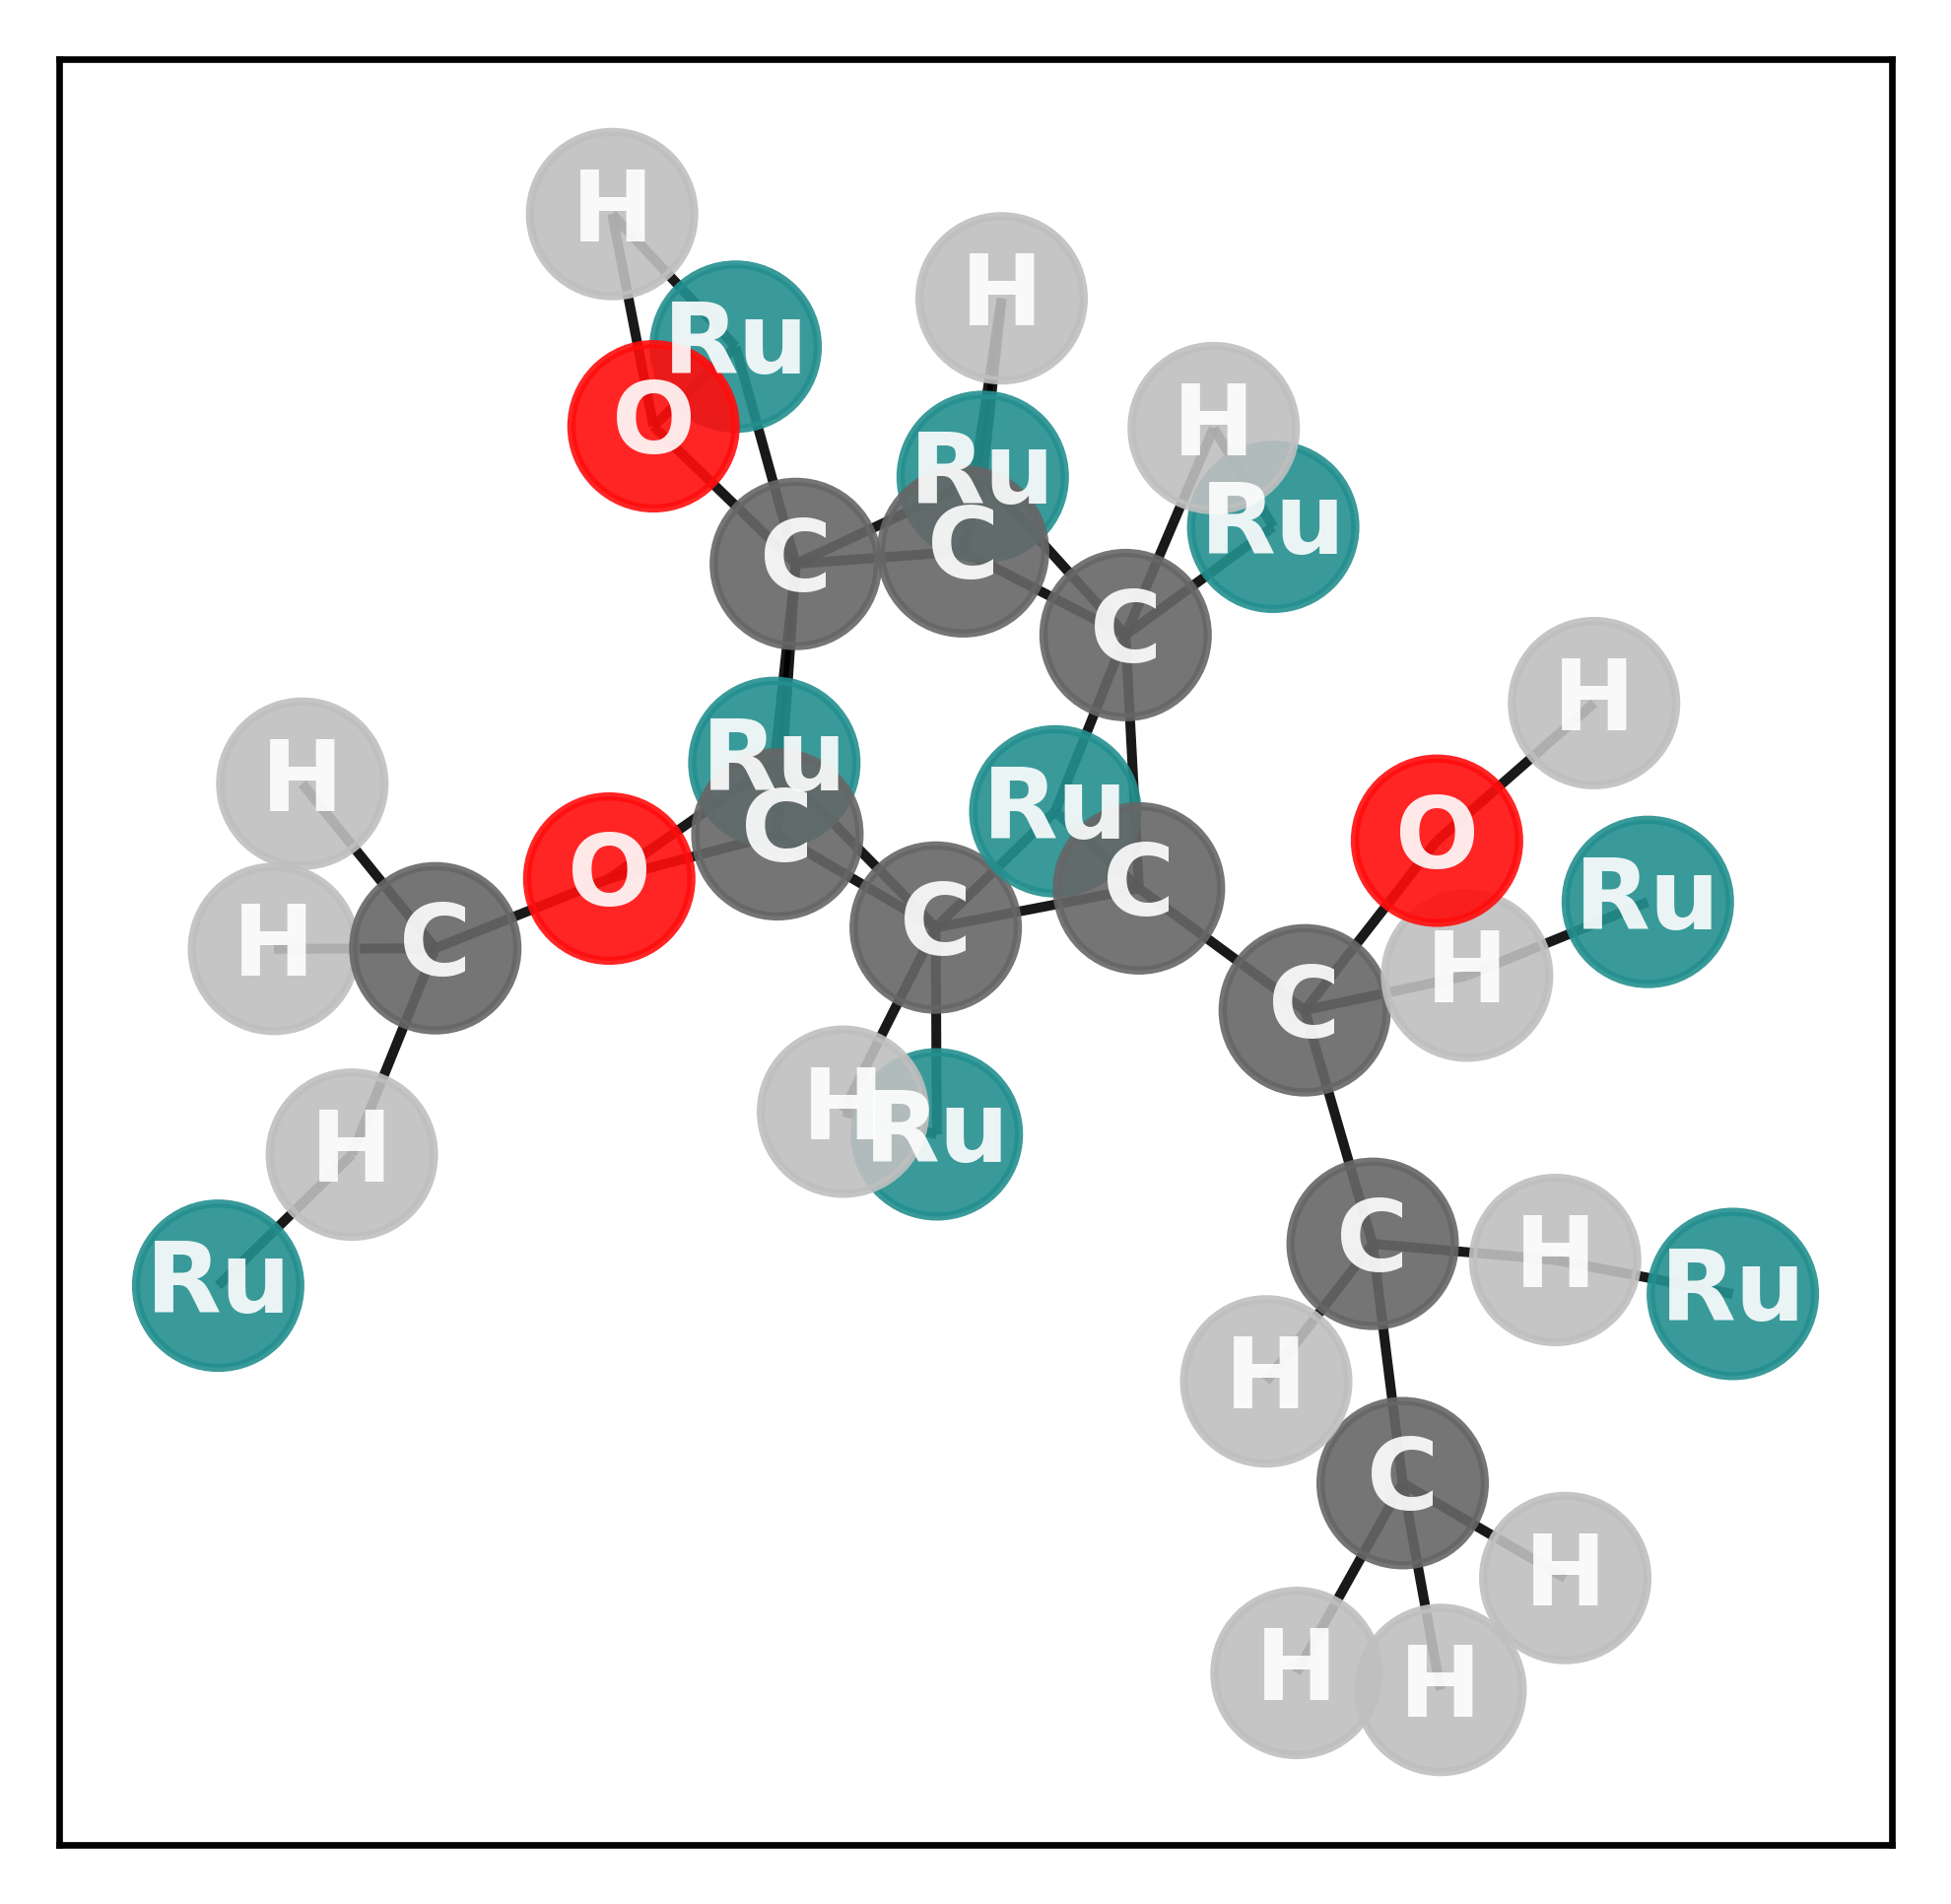

System: ru-mol5
GNN energy = -164.26 eV 
VASP energy = -164.19177753999998 eV
Abs. Error = 0.07 eV
-----------------------------------


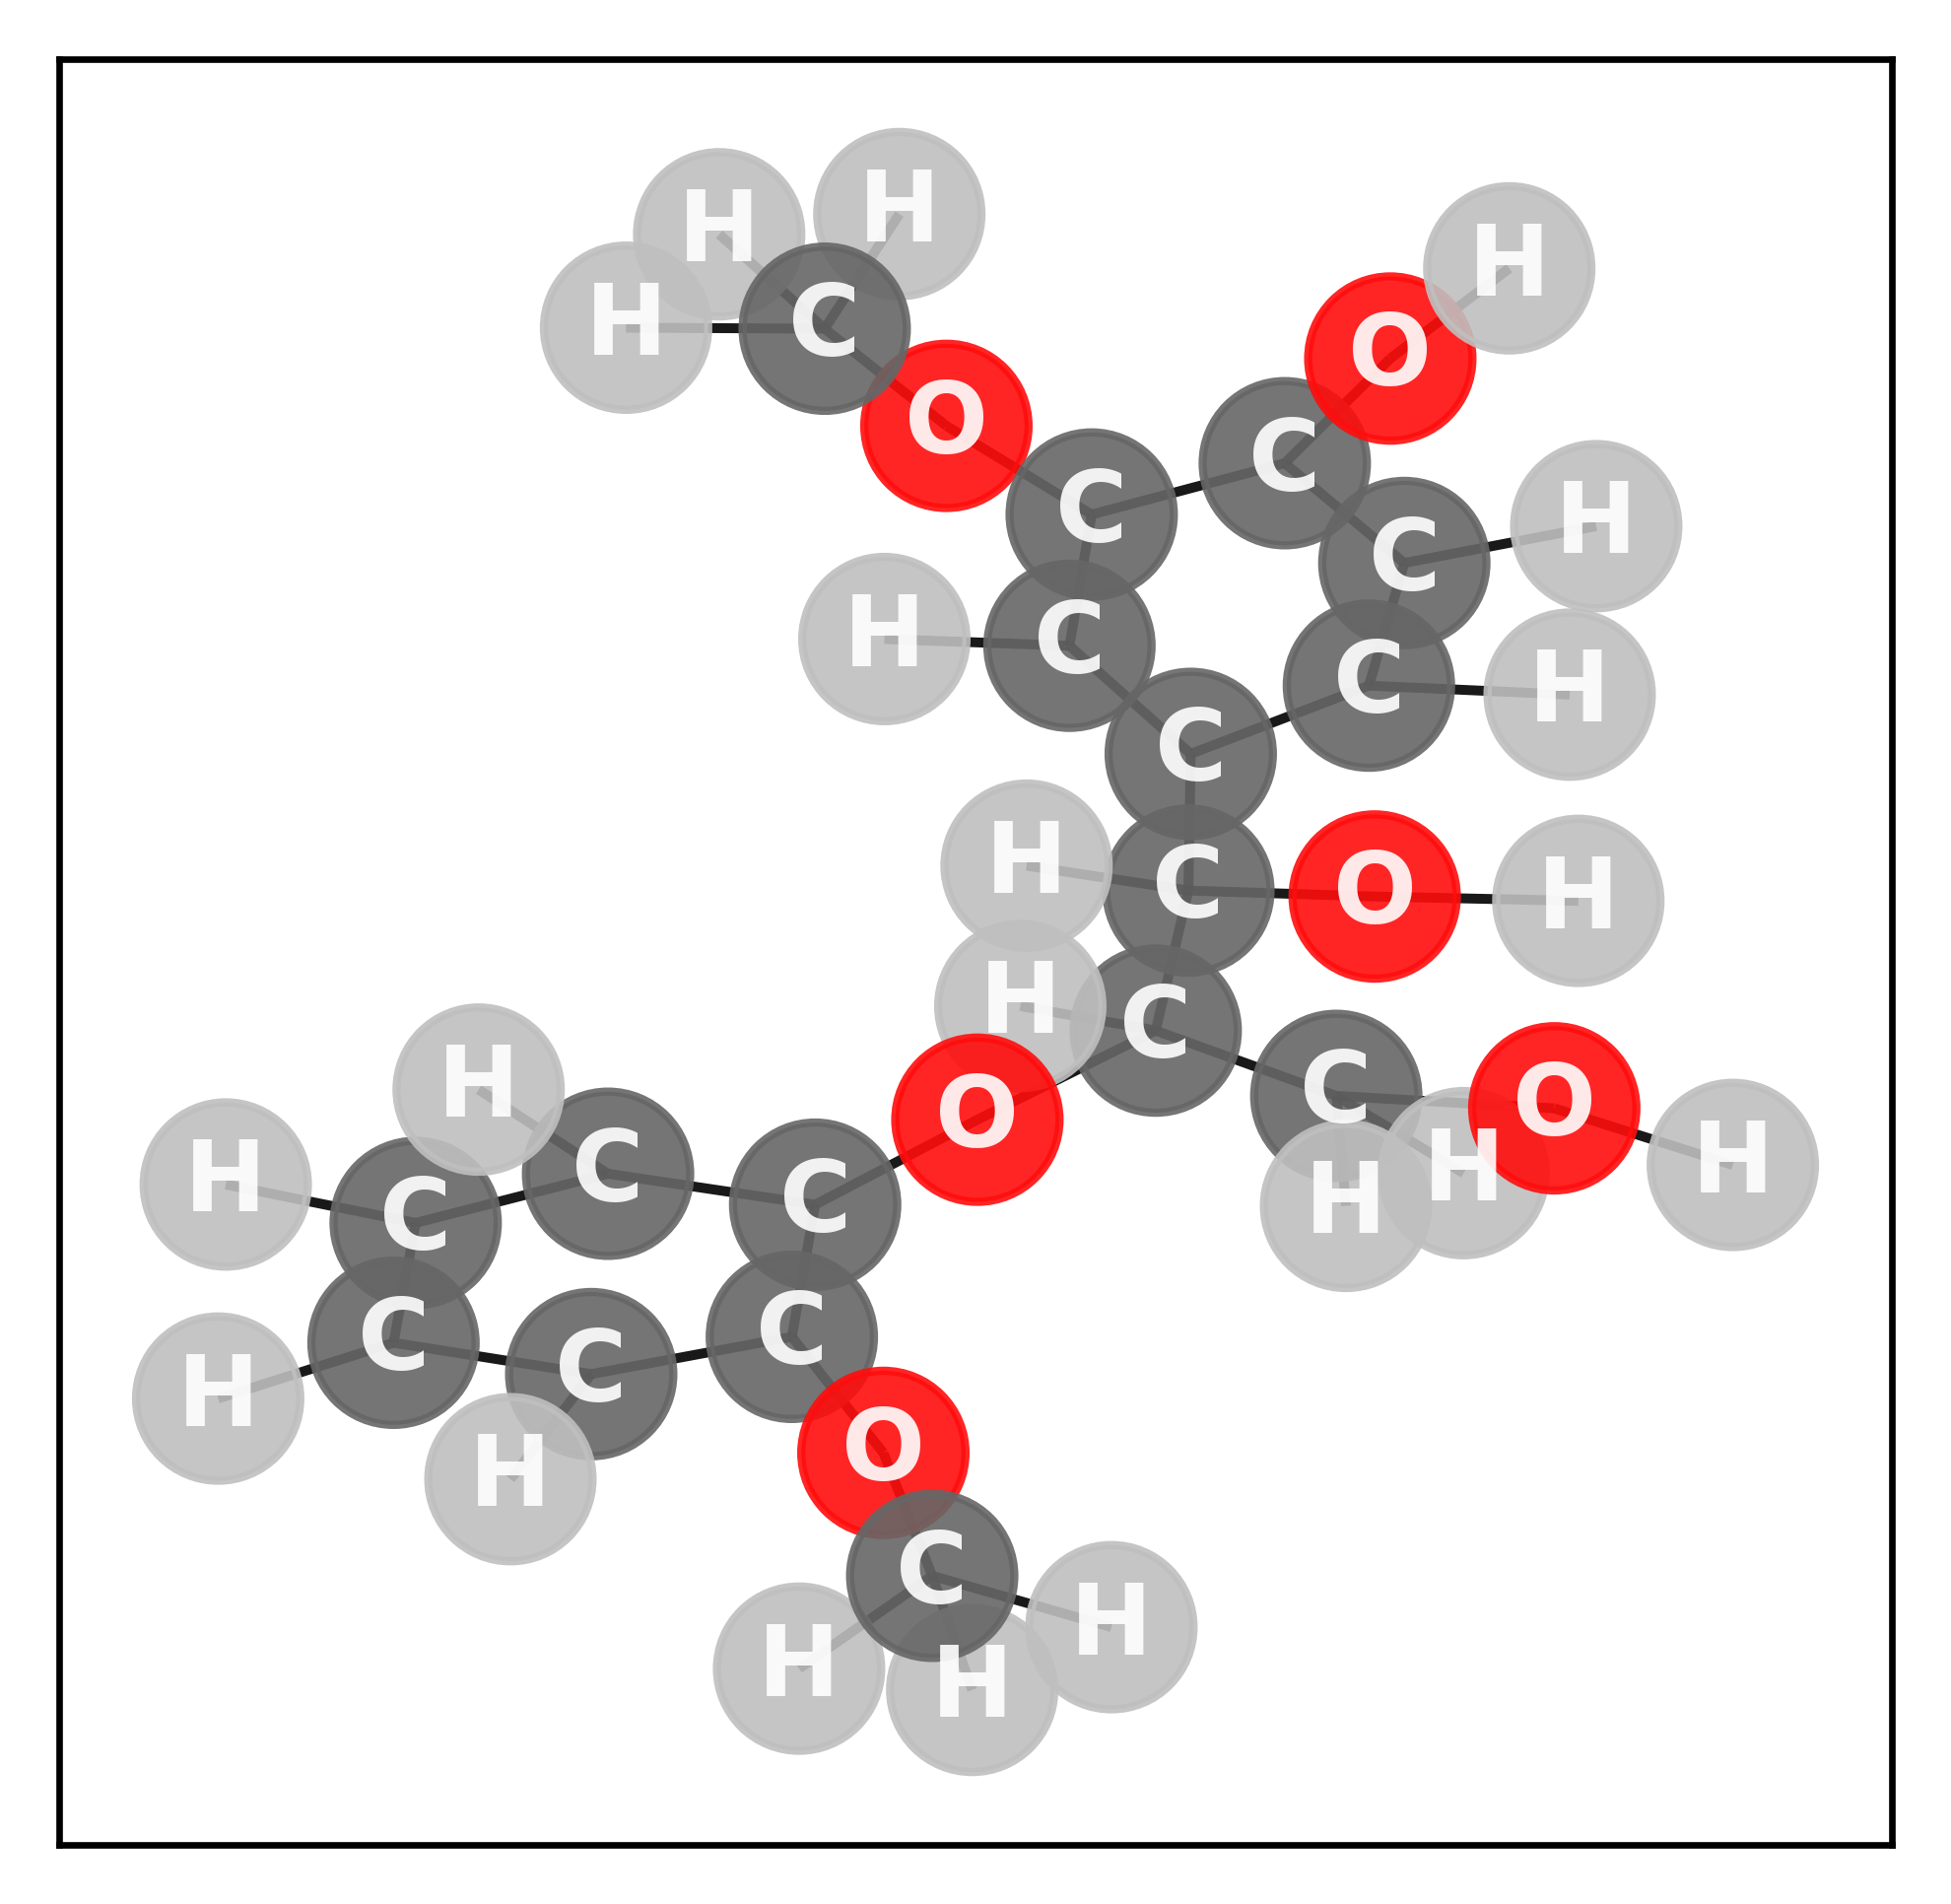

System: mol1
GNN energy = -267.55 eV 
VASP energy = -266.6203315 eV
Abs. Error = 0.93 eV
-----------------------------------


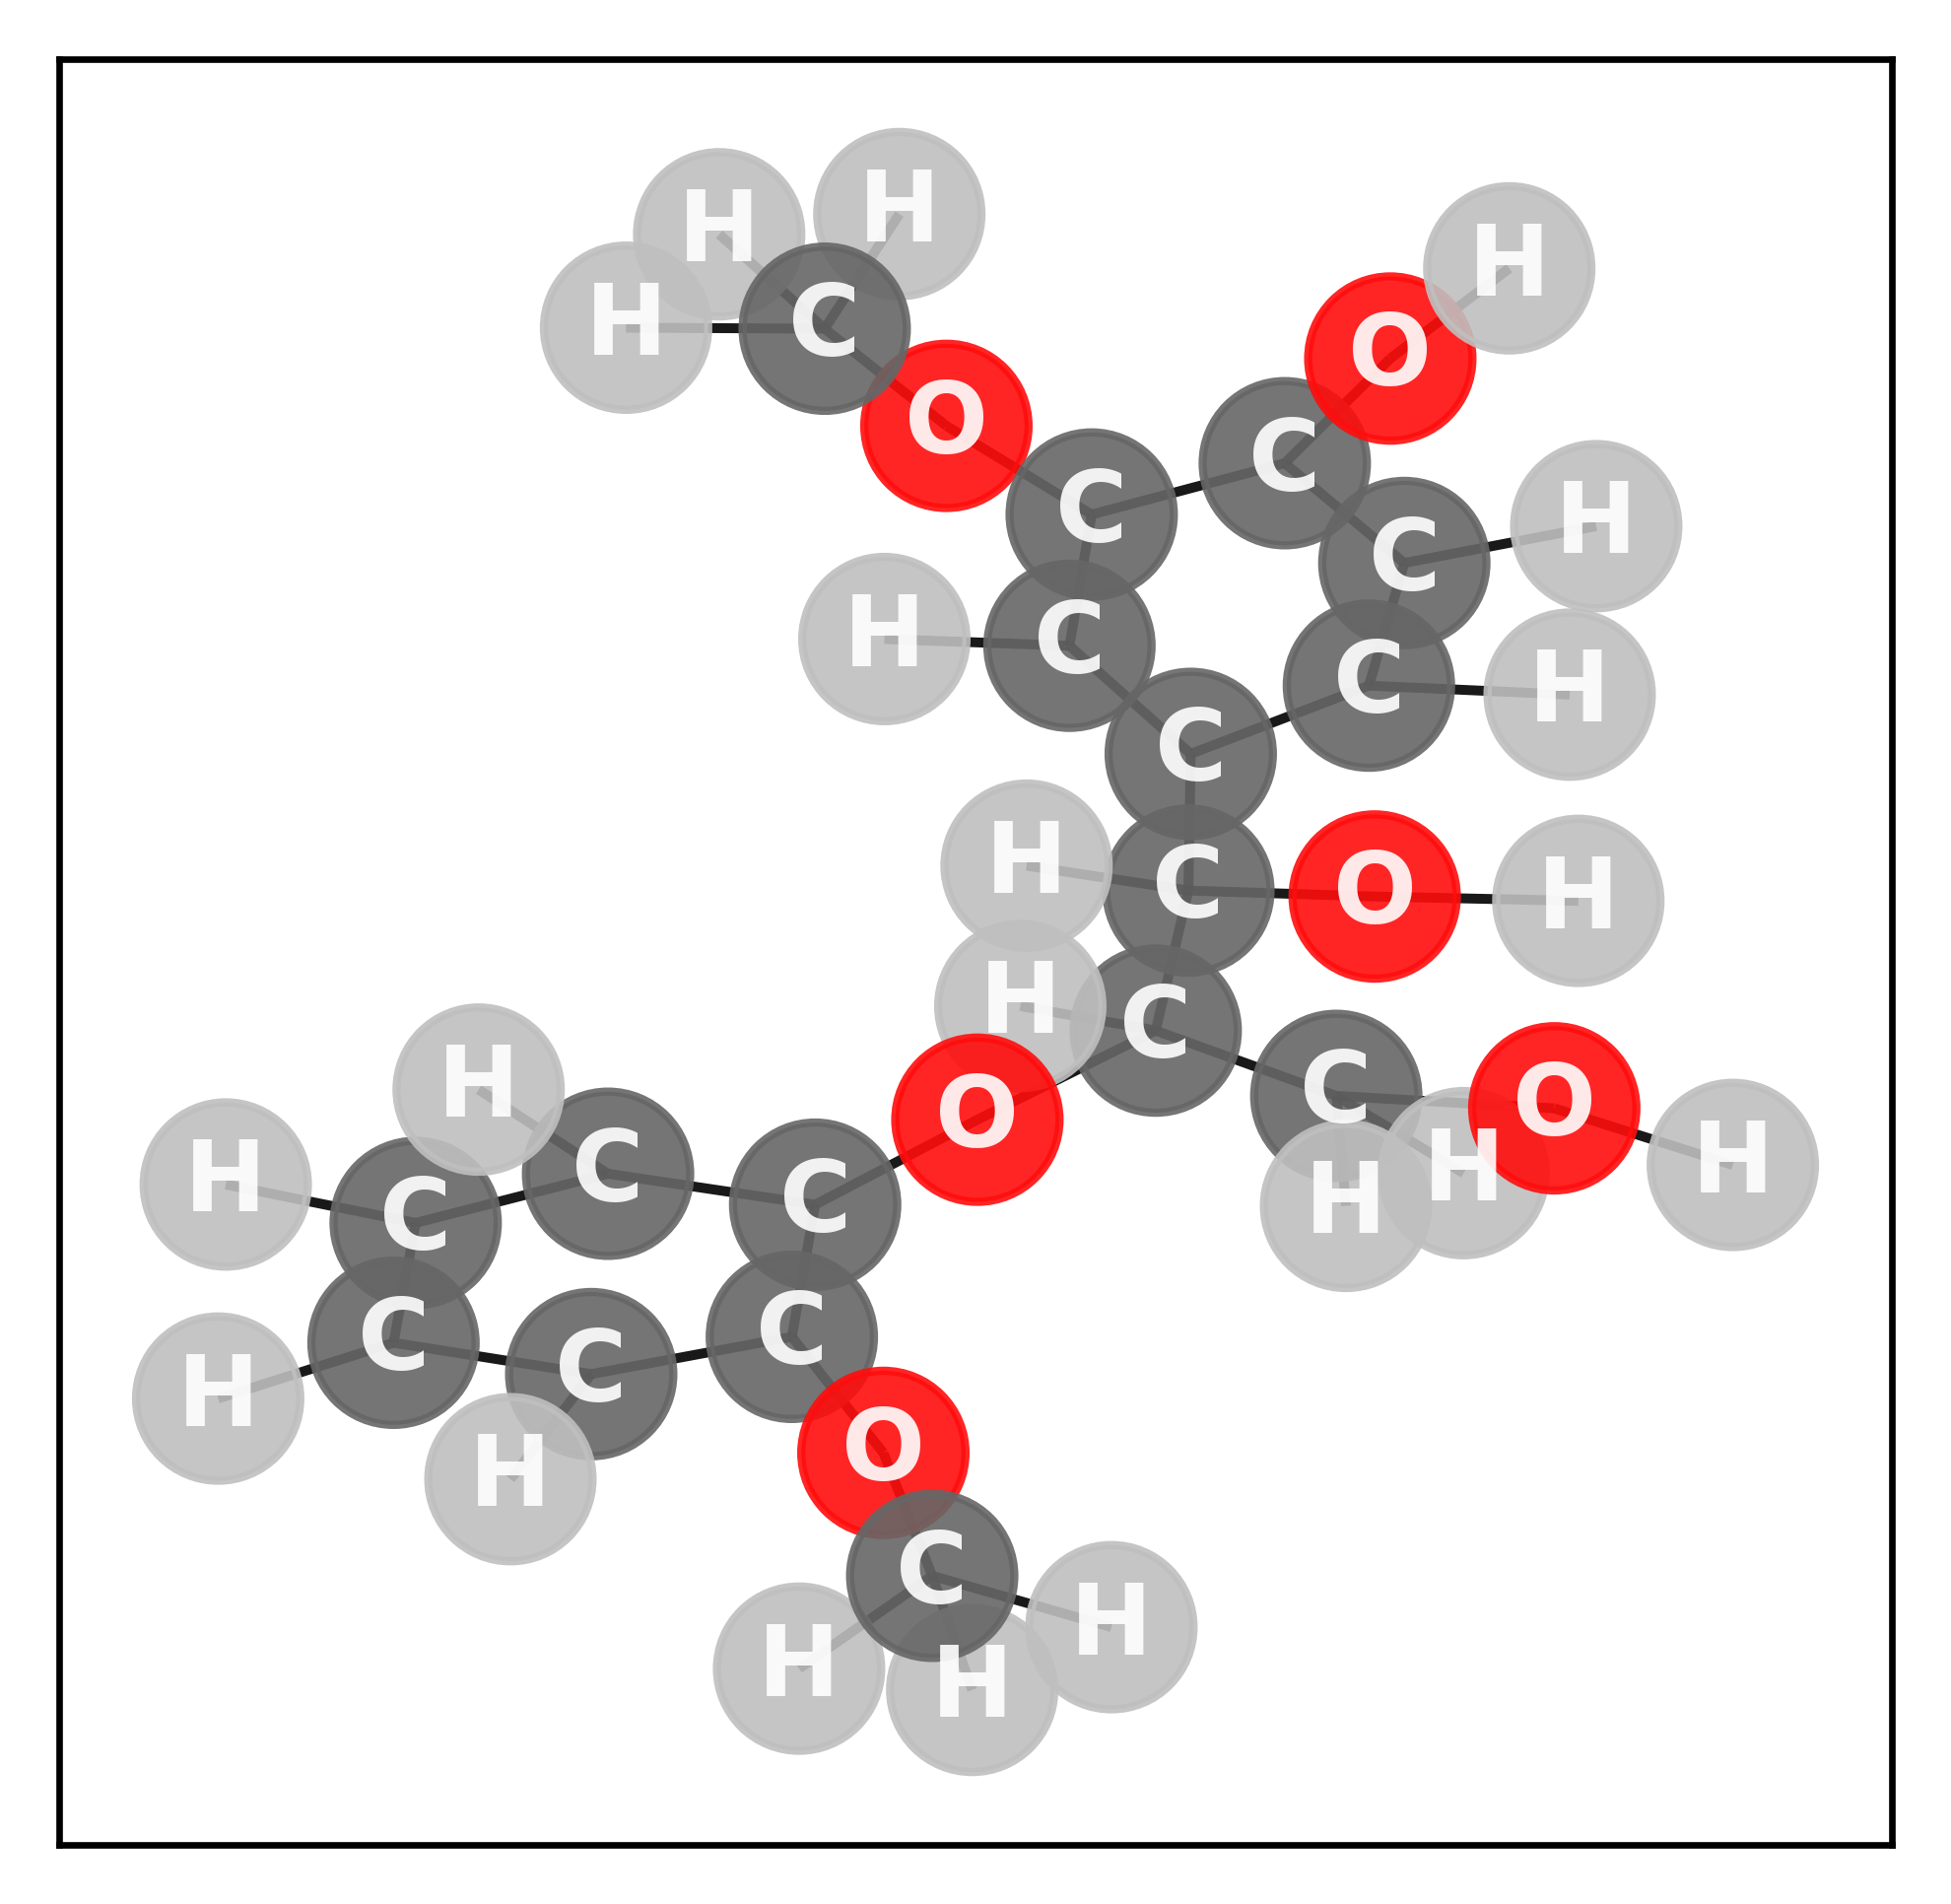

System: mol2
GNN energy = -267.55 eV 
VASP energy = -266.58212823 eV
Abs. Error = 0.97 eV
-----------------------------------


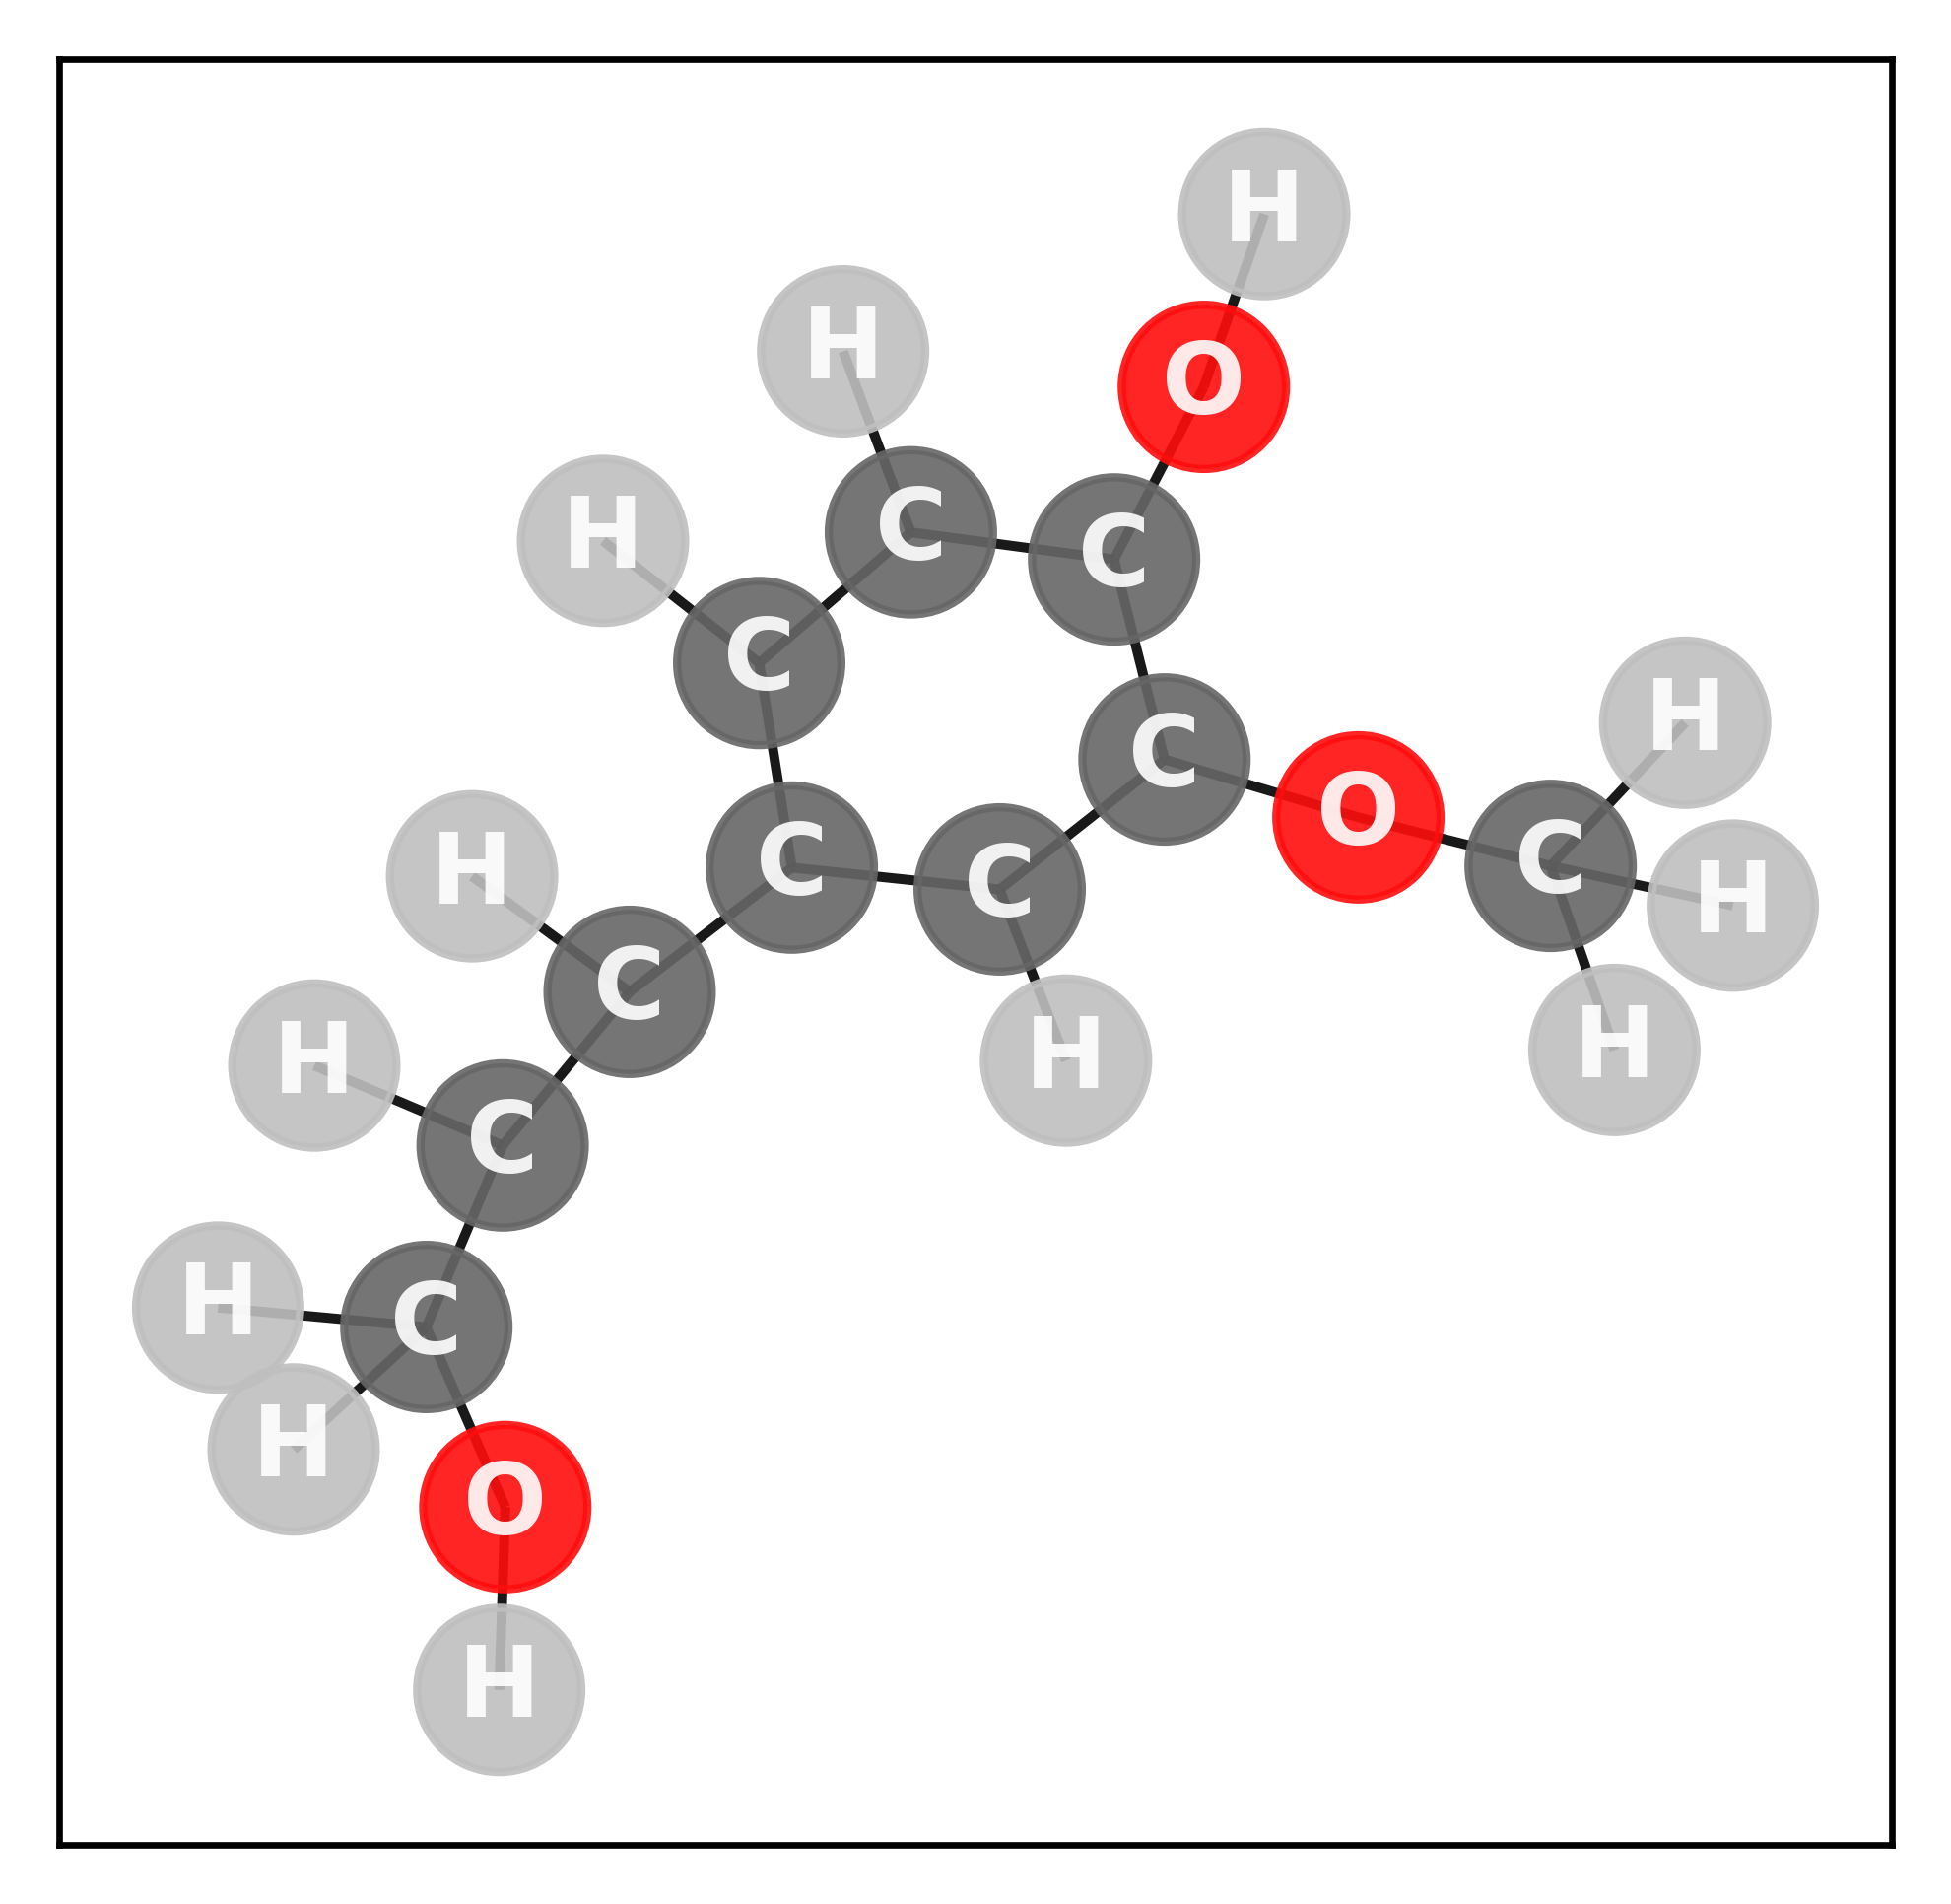

System: mol3
GNN energy = -154.95 eV 
VASP energy = -153.6018589 eV
Abs. Error = 1.35 eV
-----------------------------------


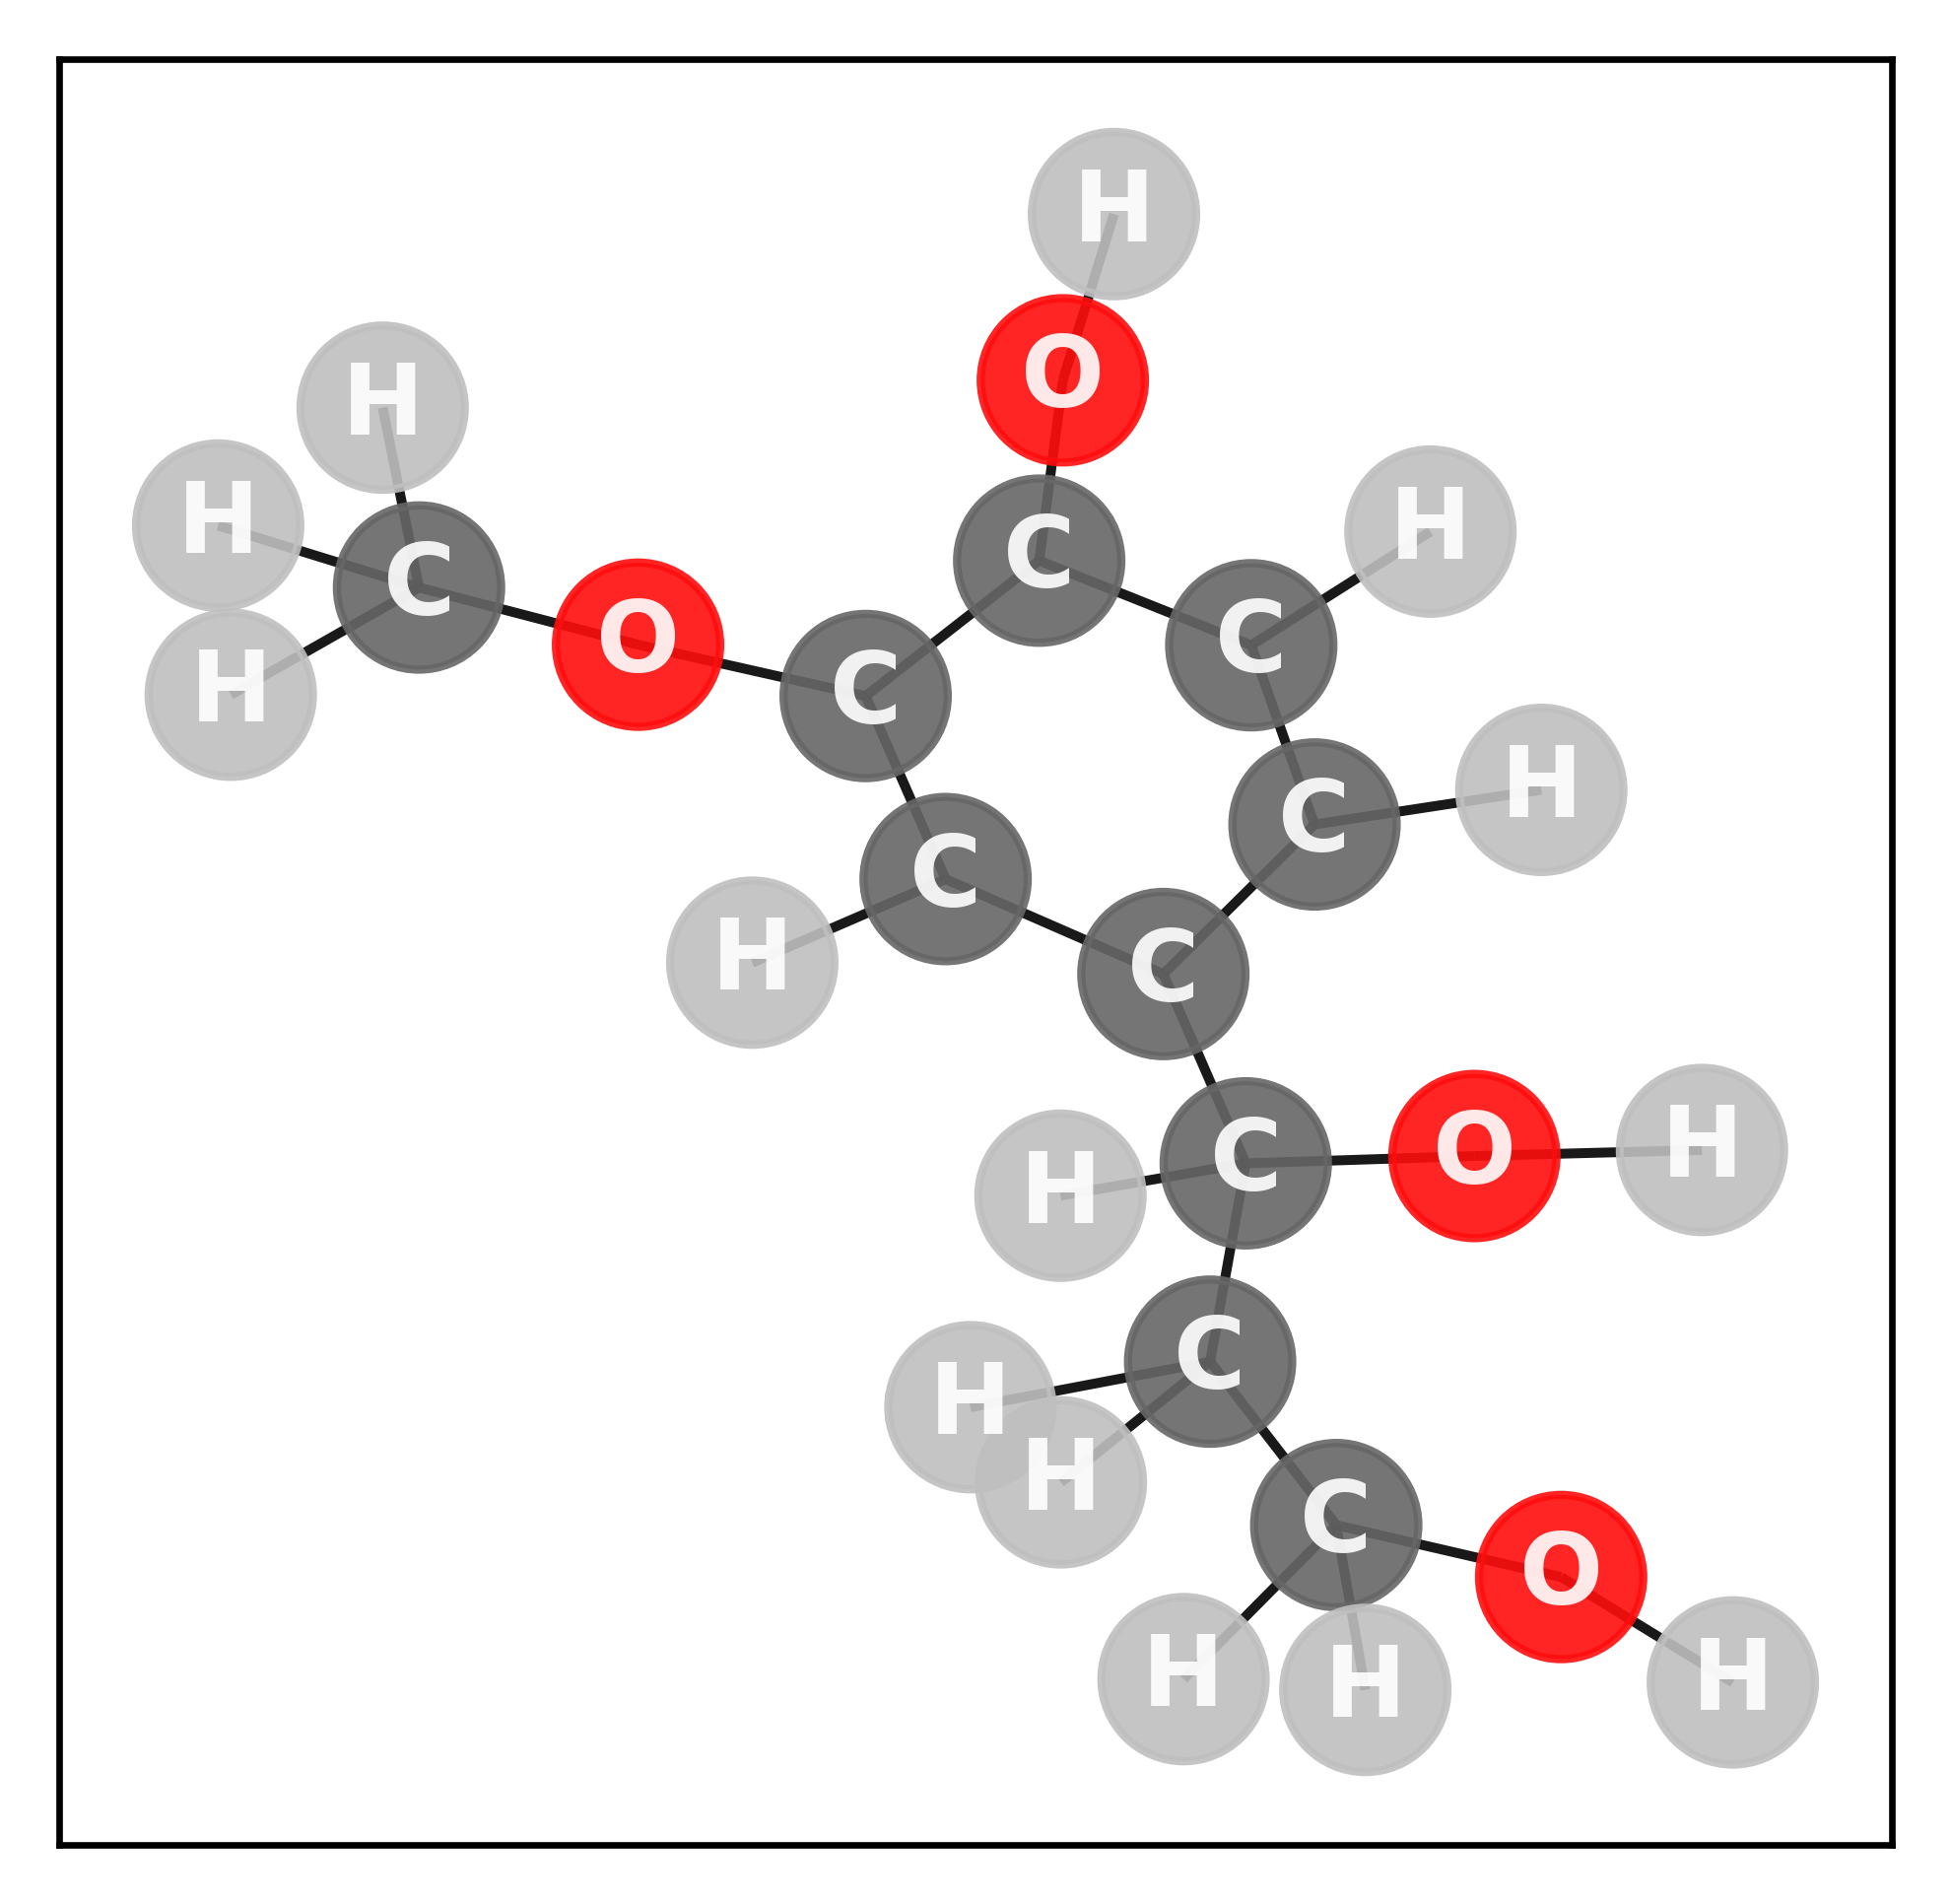

System: mol4
GNN energy = -169.51 eV 
VASP energy = -168.6743372 eV
Abs. Error = 0.84 eV
-----------------------------------


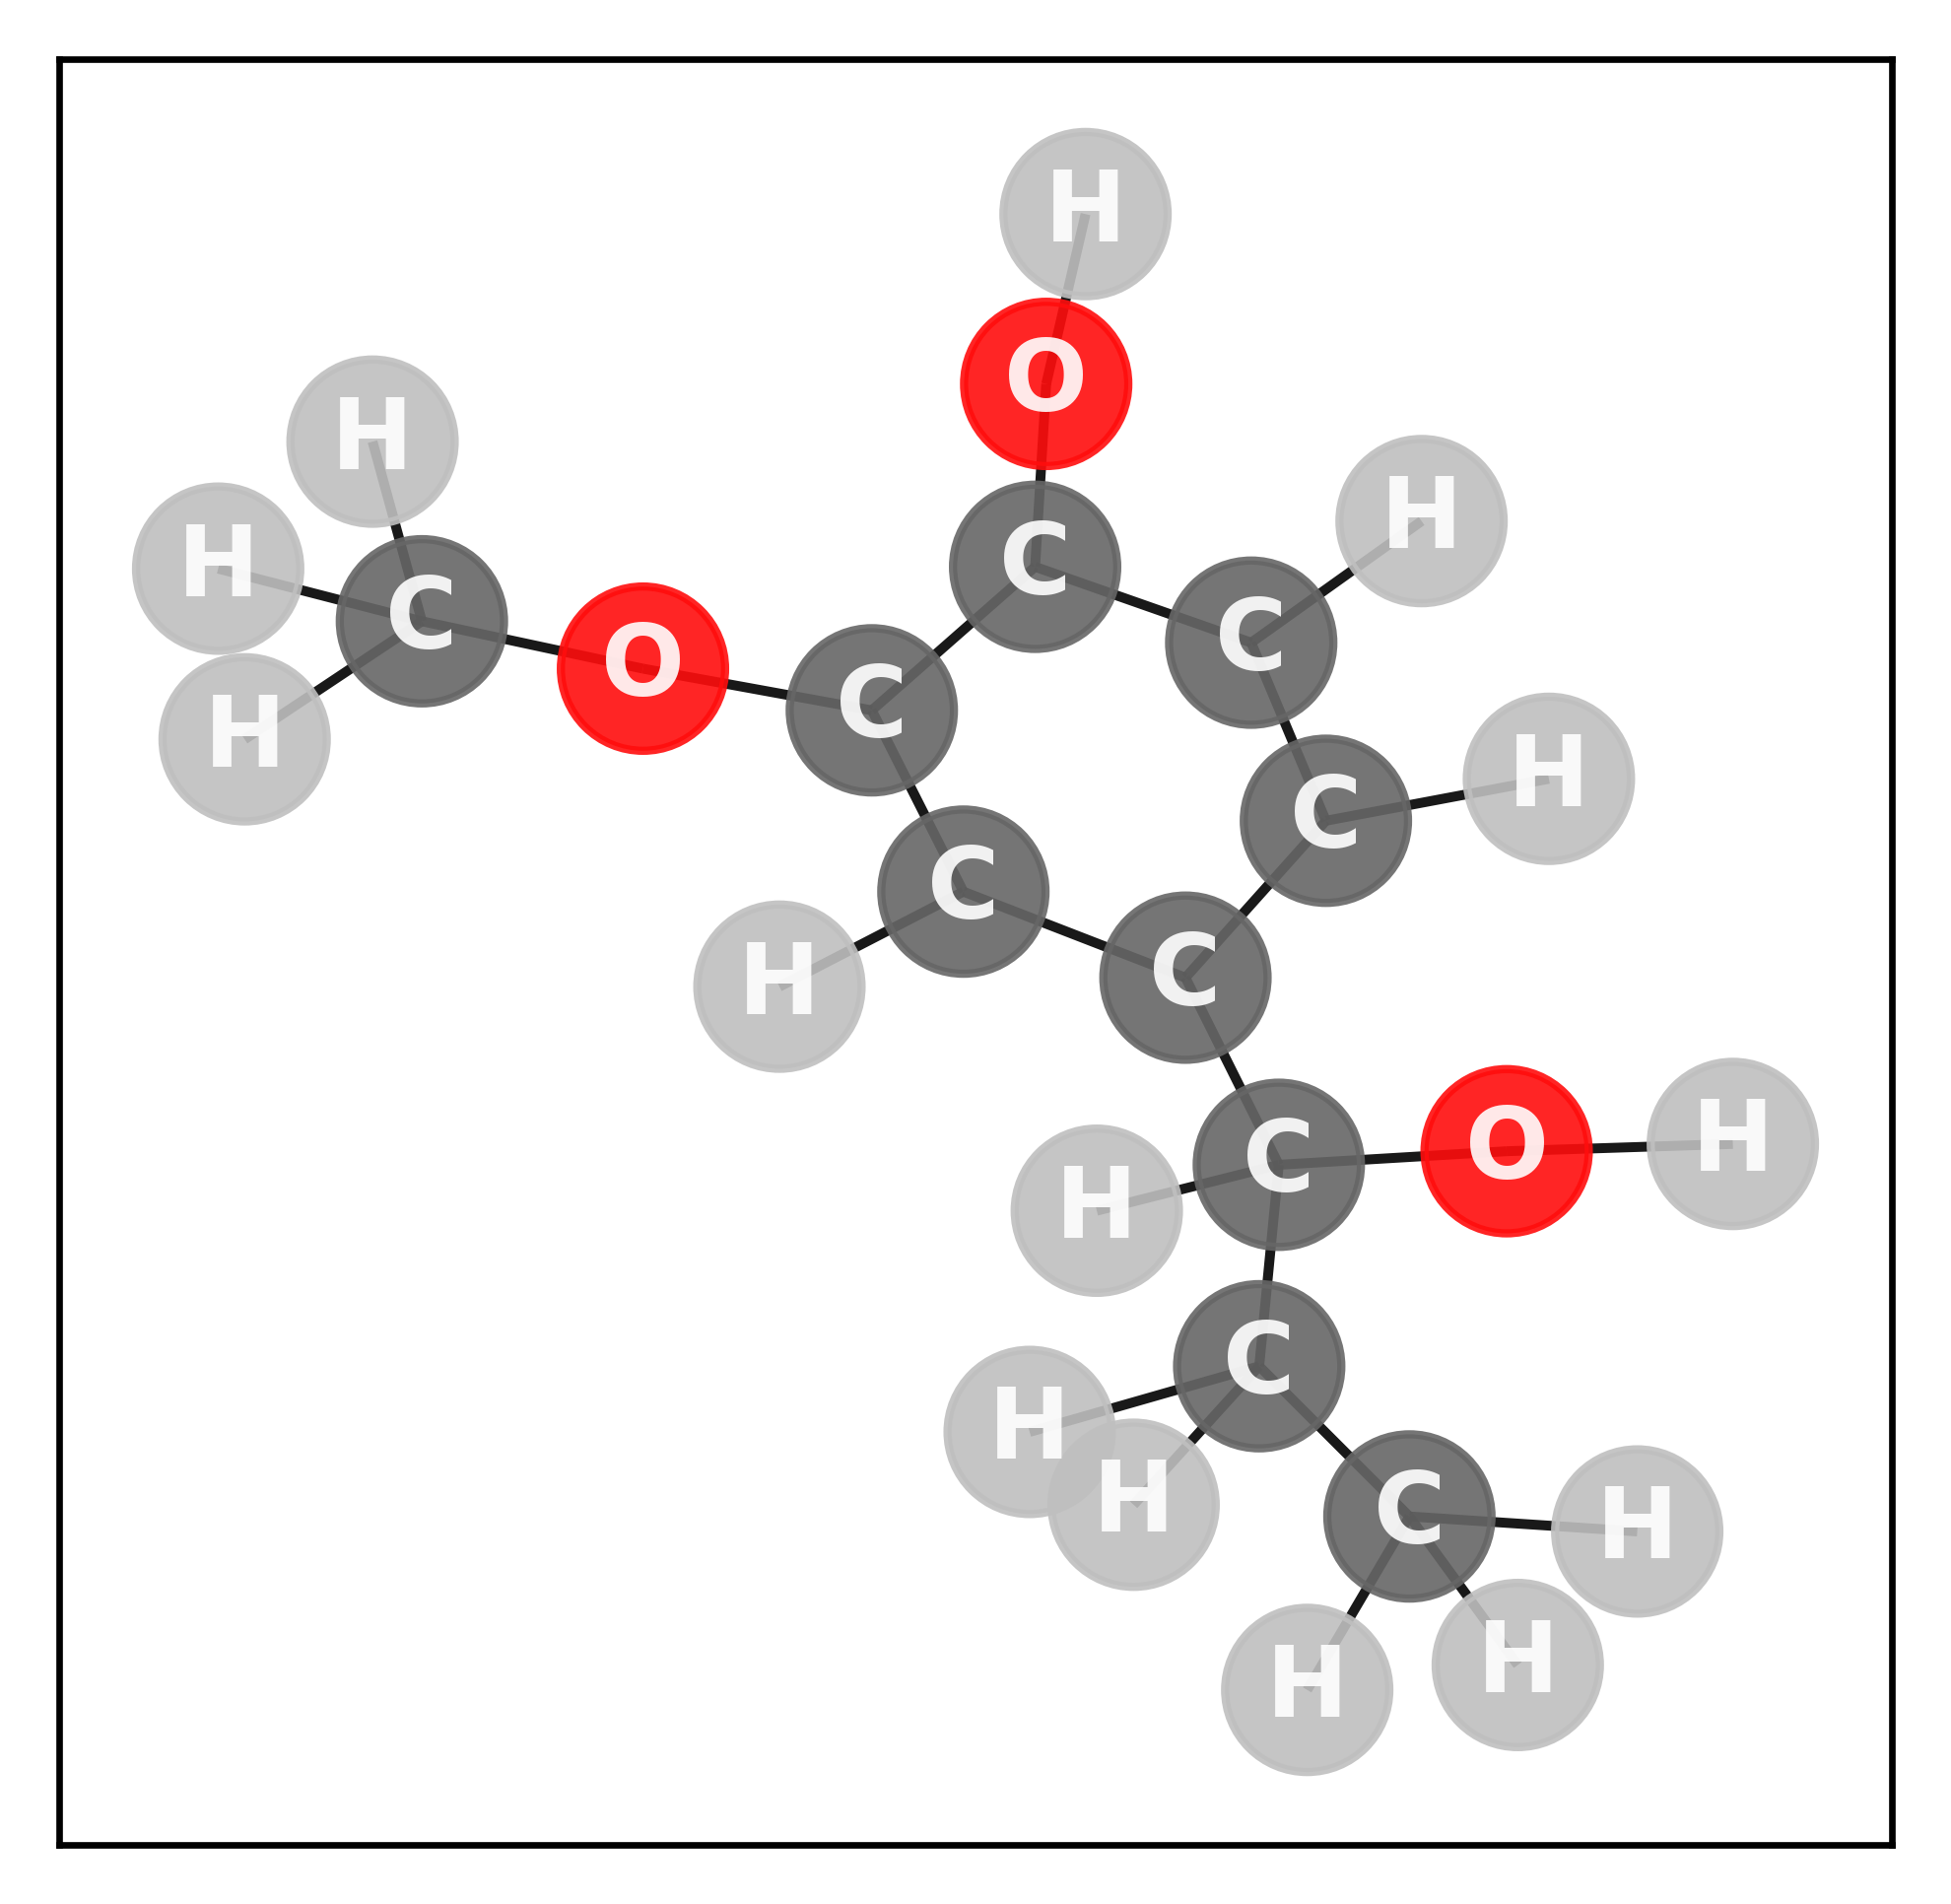

System: mol5
GNN energy = -162.82 eV 
VASP energy = -162.19930716 eV
Abs. Error = 0.62 eV
----------BIOMASS-----------------
MAE = 0.64 eV
MAE/atom = 0.02 eV/atom
----------------------------------


In [1]:
from pymatgen.io.vasp import Outcar
from pyRDTP.geomio import file_to_mol
from functions import contcar_to_graph
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
import torch
from graph_tools import plotter
import matplotlib.pyplot as plt
from nets import PreTrainedModel
import numpy as np

MODEL_NAME = "LONG_NIGHT_full"
model = PreTrainedModel(MODEL_NAME)

ni_energy = Outcar("./BM_dataset/Biomass/ni-0000/OUTCAR").final_energy
ru_energy = Outcar("./BM_dataset/Biomass/ru-0000/OUTCAR").final_energy
sur = ["ni", "ru"]
pu = ["mol1", "mol2", "mol3", "mol4", "mol5"]
sur_energy = {"ni": ni_energy, "ru": ru_energy}
error = np.zeros((len(pu)*(1 + len(sur)),1))
error_per_atom = np.zeros((len(pu)*(1 + len(sur)),1))
abs_error = np.zeros((len(pu)*(1 + len(sur)),1))
counter = 0
for metal in sur:
    for molecule in pu:
        calc = "{}-{}".format(metal, molecule)
        system = "./BM_dataset/Biomass/{}/CONTCAR".format(calc)
        s = Outcar("./BM_dataset/Biomass/{}/OUTCAR".format(calc)).final_energy
        graph = contcar_to_graph(system, model.g_tol, model.g_sf, model.g_metal_2nn)
        gnn_energy = model.evaluate(graph)
        dft_energy = s - sur_energy[metal]
        absolute_error = abs(gnn_energy - dft_energy)
        print("-----------------------------------")
        plotter(graph)
        plt.show()
        print("System: {}-{}".format(metal, molecule))
        print("GNN energy = {:.2f} eV ".format(gnn_energy))
        print("VASP energy = {} eV".format(dft_energy))
        print("Abs. Error = {:.2f} eV".format(absolute_error))
        error[counter] = dft_energy - gnn_energy
        abs_error[counter] = absolute_error
        error_per_atom[counter] = abs_error[counter] / graph.num_nodes
        counter += 1
for molecule in pu:  # gas phase molecules
    system = "./BM_dataset/Biomass/{}/CONTCAR".format(molecule)
    s = Outcar("./BM_dataset/Biomass/{}/OUTCAR".format(molecule)).final_energy
    graph = contcar_to_graph(system, model.g_tol, model.g_sf, model.g_metal_2nn)
    gnn_energy = model.evaluate(graph)
    dft_energy = s
    absolute_error = abs(gnn_energy - dft_energy)
    print("-----------------------------------")
    plotter(graph)
    plt.show()
    print("System: {}".format(molecule))
    print("GNN energy = {:.2f} eV ".format(gnn_energy))
    print("VASP energy = {} eV".format(s))
    print("Abs. Error = {:.2f} eV".format(absolute_error))
    error[counter] = dft_energy - gnn_energy
    abs_error[counter] = absolute_error
    error_per_atom[counter] = abs_error[counter] / graph.num_nodes
    counter += 1
print("----------BIOMASS-----------------")
print("MAE = {:.2f} eV".format(np.mean(abs_error)))
print("MAE/atom = {:.2f} eV/atom".format(np.mean(error_per_atom)))
print("----------------------------------")
        

In [2]:
0.64 * 15

9.6